In [1]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import sys

sys.path.append("..")

import GanUtils as utils
import GaussianMixtureUtils as GMutils

sys.path.append("../DiscriminativeNN")


import DiscGaussianMixture5Layers as disc

sys.path.append("../GenerativeNN")

import GenGaussianMixture5Layers as gen

manualSeed = random.randint(1, 10000) # fix seed
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

%matplotlib inline

Random Seed:  6880


# Playing with the n_critic parameters.
## n_critic = 20

In [ ]:
batchSize = 64
nz = 10
nc = 2 # Number of outputs
ndf = 100
ngf = 100
niter = 100
nElements = 1000
lr = 0.00005
beta1 = 0.5
n_critic = 20 # Training more the discriminator

c = 0.01 # clip

In [11]:
netG = torch.nn.Sequential(
    torch.nn.Linear(nz, ngf),
    torch.nn.ReLU(),
    torch.nn.Linear(ngf, nc),
    torch.nn.Tanh()
)


netD = torch.nn.Sequential(
    torch.nn.Linear(nc, ndf),
    torch.nn.ReLU(),
    torch.nn.Linear(ndf, 1)
)

In [12]:
optimizerG = optim.RMSprop(netG.parameters(), lr = lr)
optimizerD = optim.RMSprop(netD.parameters(), lr = lr)

In [13]:
# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)

input = Variable(input)
noise = Variable(noise)

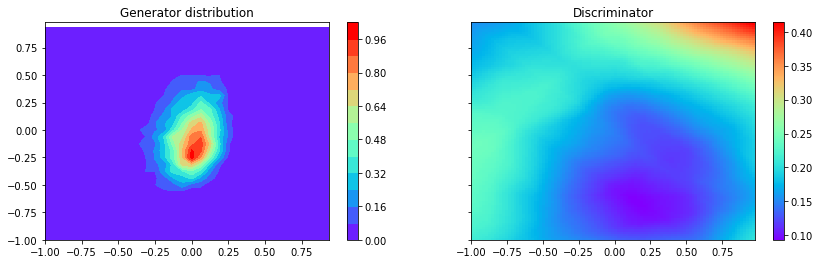

[1/100][999/1000] Loss_D: -0.00037381 Loss_G: -0.0115 D(G(z)): 0.0115


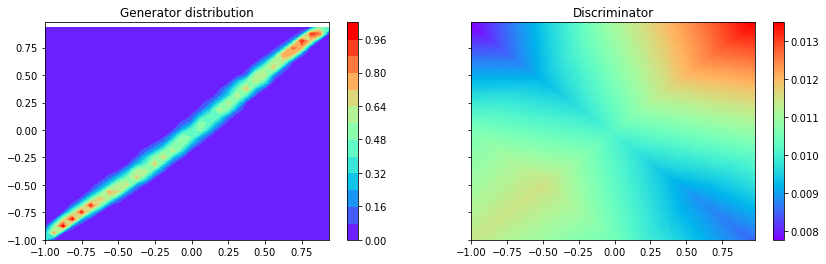

[2/100][999/1000] Loss_D: -0.00016921 Loss_G: -0.0098 D(G(z)): 0.0098


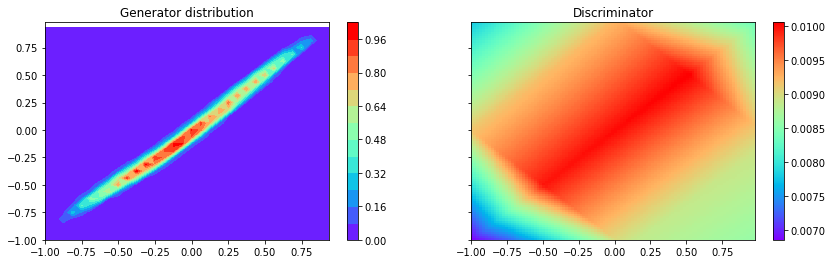

[3/100][999/1000] Loss_D: 0.00002556 Loss_G: -0.0099 D(G(z)): 0.0099


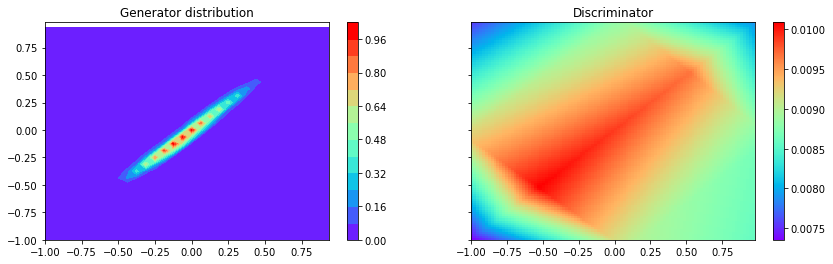

[4/100][999/1000] Loss_D: -0.00002954 Loss_G: -0.0099 D(G(z)): 0.0099


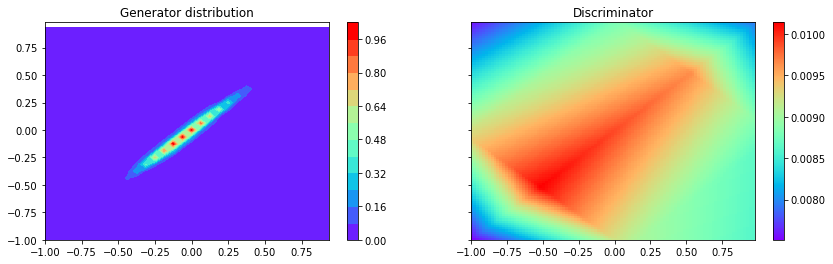

[5/100][999/1000] Loss_D: -0.00016176 Loss_G: -0.0096 D(G(z)): 0.0096


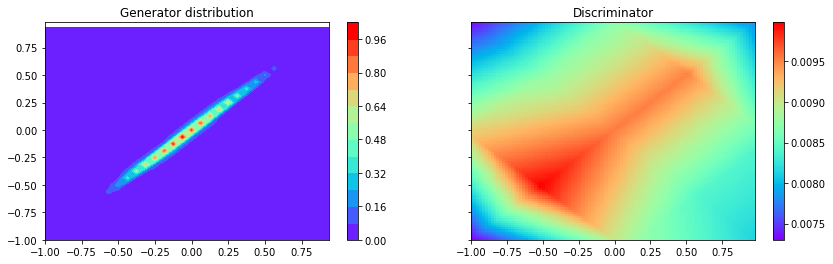

[6/100][999/1000] Loss_D: -0.00011003 Loss_G: -0.0099 D(G(z)): 0.0099


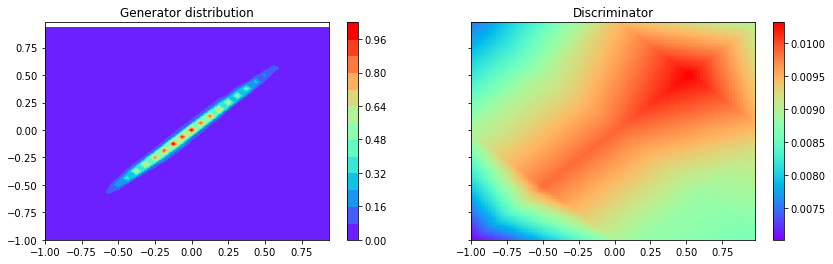

[7/100][999/1000] Loss_D: -0.00012282 Loss_G: -0.0099 D(G(z)): 0.0099


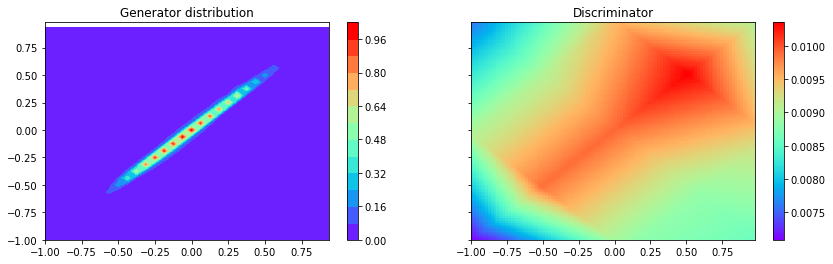

[8/100][999/1000] Loss_D: -0.00014091 Loss_G: -0.0094 D(G(z)): 0.0094


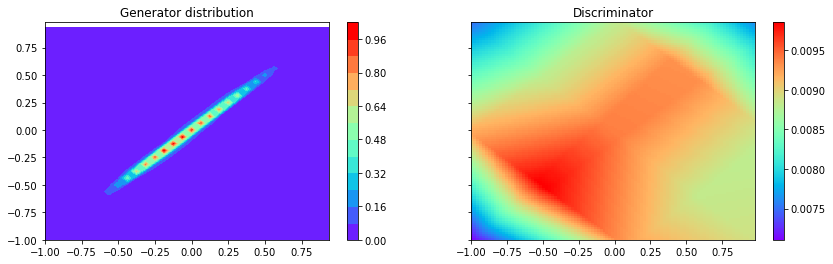

[9/100][999/1000] Loss_D: -0.00008057 Loss_G: -0.0094 D(G(z)): 0.0094


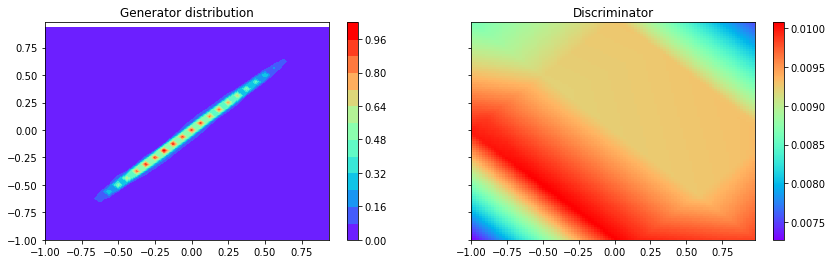

[10/100][999/1000] Loss_D: -0.00020530 Loss_G: -0.0092 D(G(z)): 0.0092


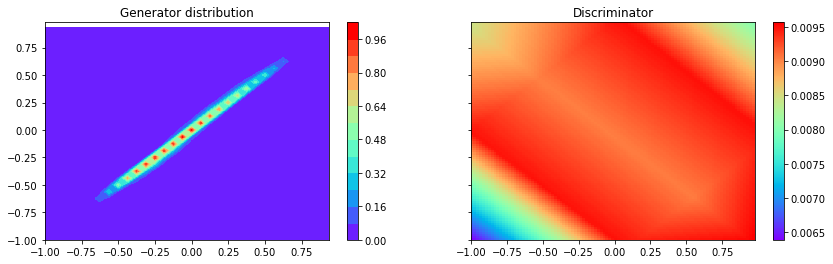

[11/100][999/1000] Loss_D: -0.00023856 Loss_G: -0.0095 D(G(z)): 0.0095


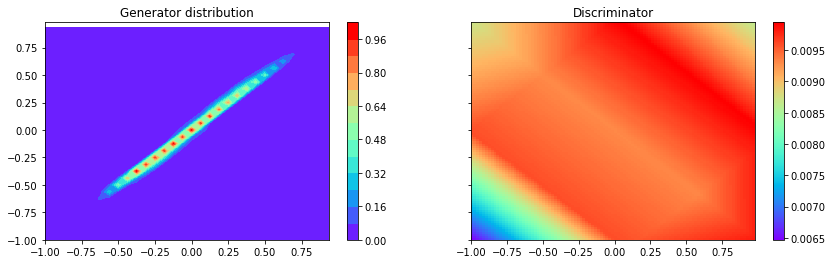

[12/100][999/1000] Loss_D: -0.00019911 Loss_G: -0.0094 D(G(z)): 0.0094


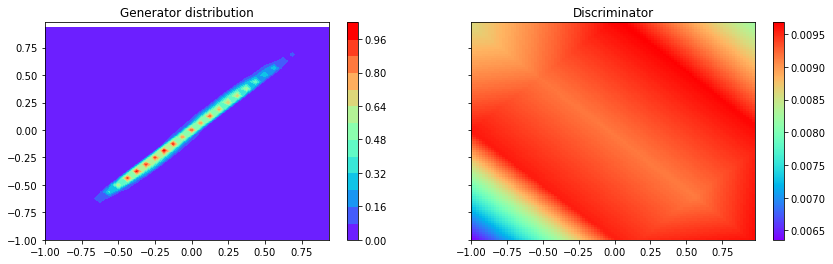

[13/100][999/1000] Loss_D: -0.00019952 Loss_G: -0.0096 D(G(z)): 0.0096


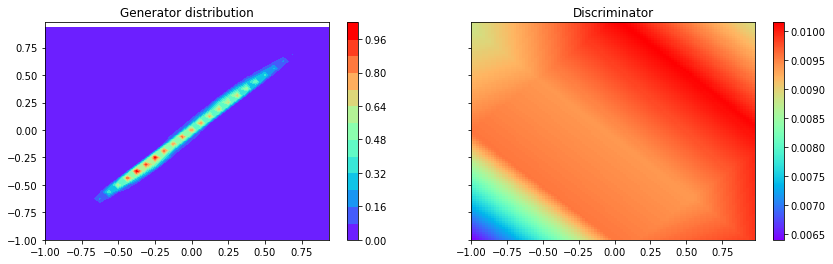

[14/100][999/1000] Loss_D: -0.00033123 Loss_G: -0.0090 D(G(z)): 0.0090


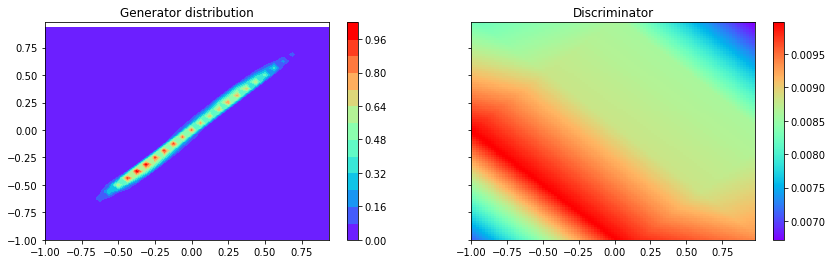

[15/100][999/1000] Loss_D: -0.00021094 Loss_G: -0.0094 D(G(z)): 0.0094


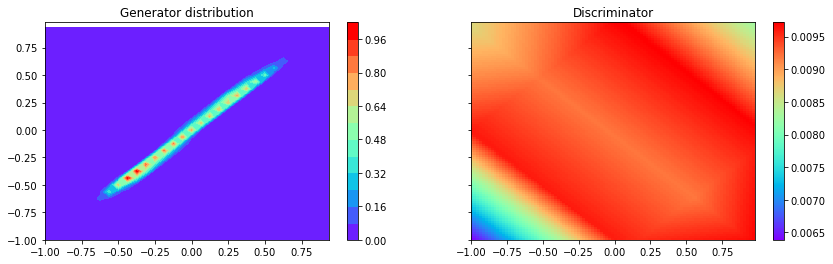

[16/100][999/1000] Loss_D: -0.00023634 Loss_G: -0.0091 D(G(z)): 0.0091


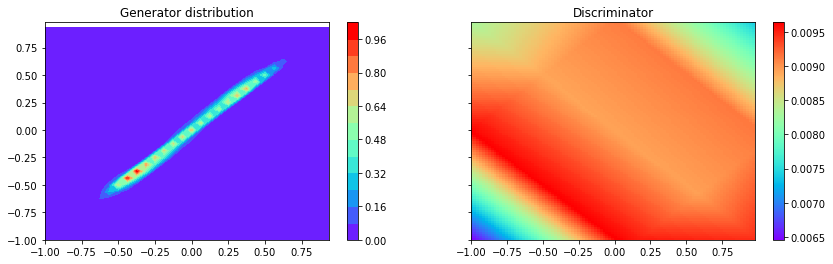

[17/100][999/1000] Loss_D: -0.00021197 Loss_G: -0.0091 D(G(z)): 0.0091


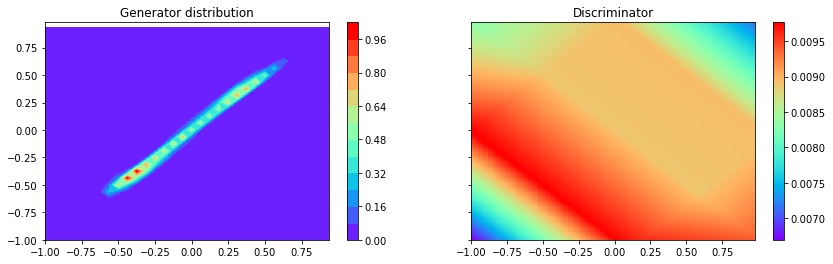

[18/100][999/1000] Loss_D: -0.00014047 Loss_G: -0.0096 D(G(z)): 0.0096


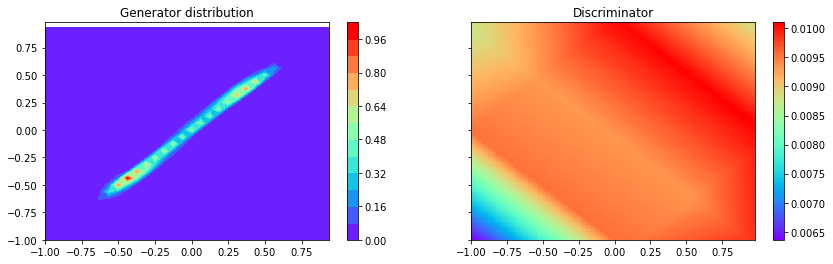

[19/100][999/1000] Loss_D: -0.00015048 Loss_G: -0.0097 D(G(z)): 0.0097


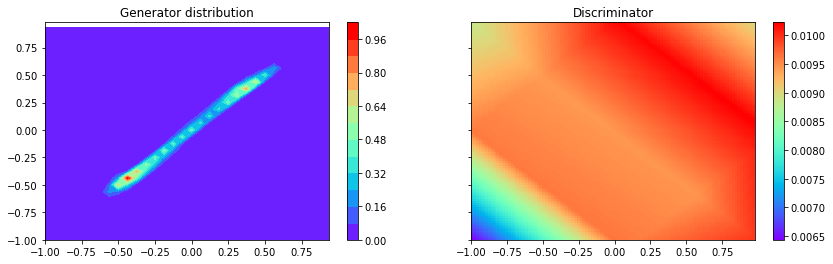

[20/100][999/1000] Loss_D: -0.00016955 Loss_G: -0.0096 D(G(z)): 0.0096


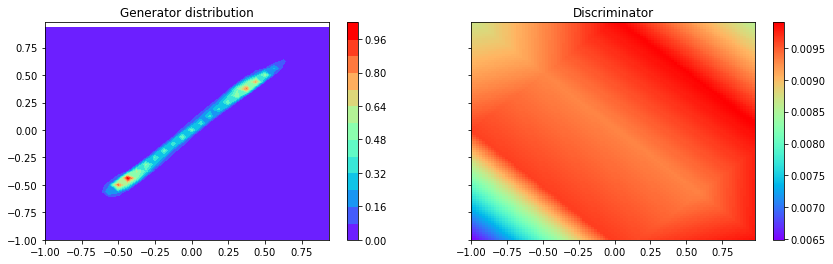

[21/100][999/1000] Loss_D: -0.00018812 Loss_G: -0.0097 D(G(z)): 0.0097


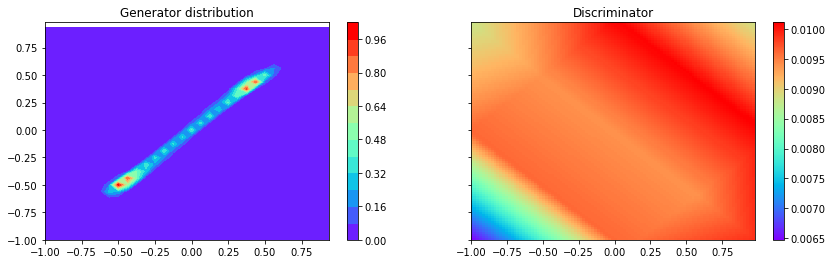

[22/100][999/1000] Loss_D: -0.00026824 Loss_G: -0.0098 D(G(z)): 0.0098


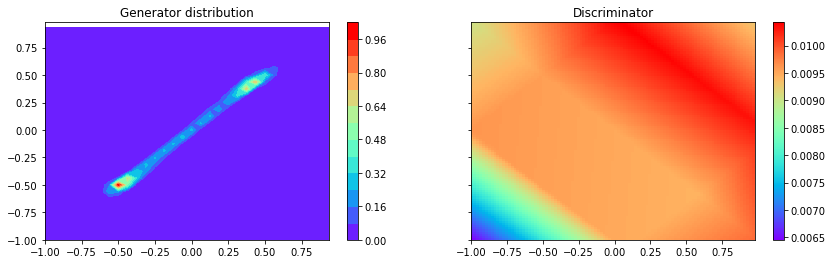

[23/100][999/1000] Loss_D: -0.00011799 Loss_G: -0.0096 D(G(z)): 0.0096


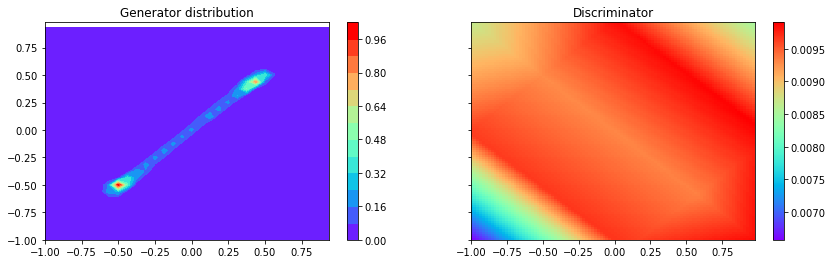

[24/100][999/1000] Loss_D: -0.00015042 Loss_G: -0.0095 D(G(z)): 0.0095


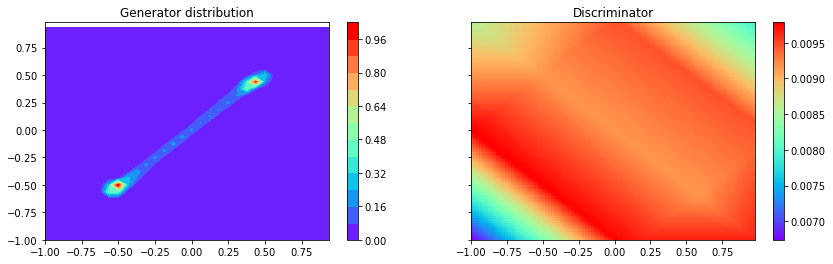

[25/100][999/1000] Loss_D: -0.00013267 Loss_G: -0.0098 D(G(z)): 0.0098


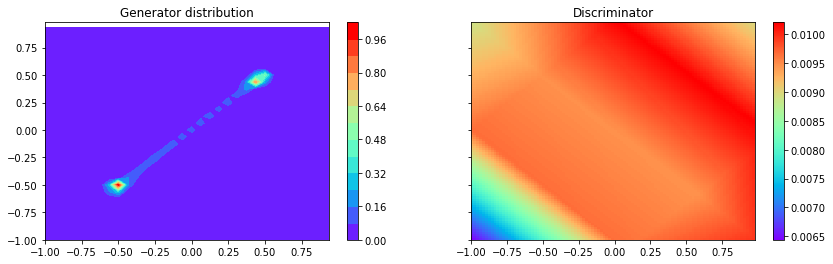

[26/100][999/1000] Loss_D: -0.00009451 Loss_G: -0.0096 D(G(z)): 0.0096


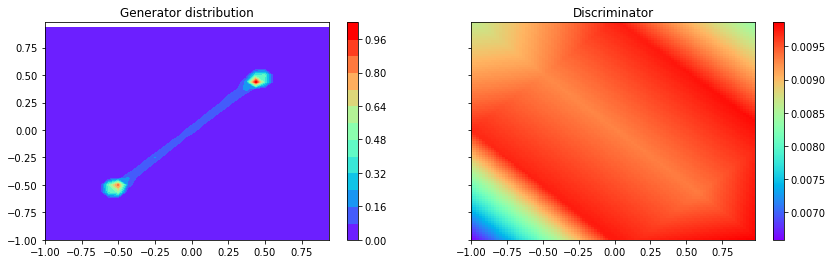

[27/100][999/1000] Loss_D: -0.00011013 Loss_G: -0.0097 D(G(z)): 0.0097


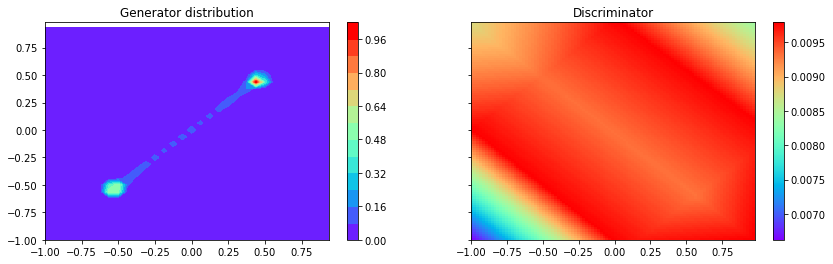

[28/100][999/1000] Loss_D: -0.00016192 Loss_G: -0.0097 D(G(z)): 0.0097


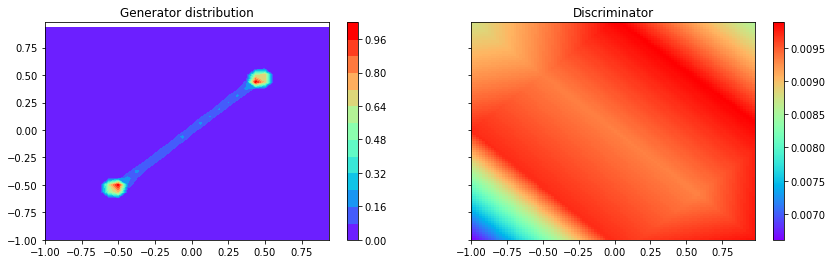

[29/100][999/1000] Loss_D: -0.00002495 Loss_G: -0.0094 D(G(z)): 0.0094


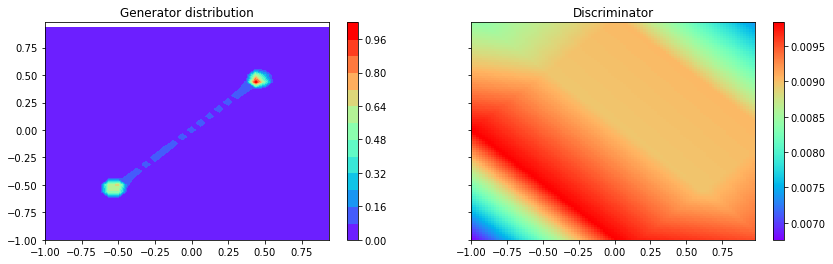

[30/100][999/1000] Loss_D: -0.00005671 Loss_G: -0.0099 D(G(z)): 0.0099


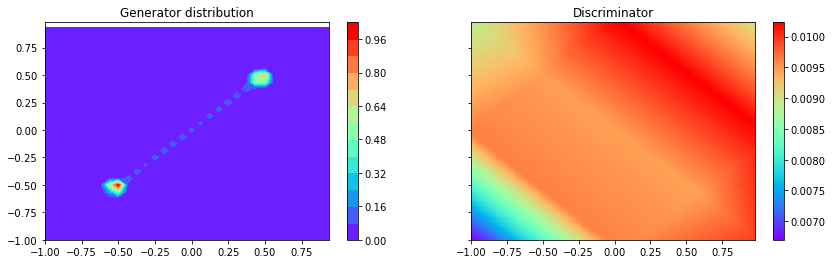

[31/100][999/1000] Loss_D: -0.00000406 Loss_G: -0.0093 D(G(z)): 0.0093


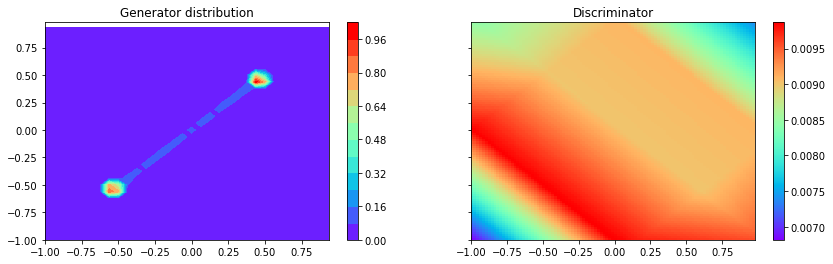

[32/100][999/1000] Loss_D: -0.00004806 Loss_G: -0.0096 D(G(z)): 0.0096


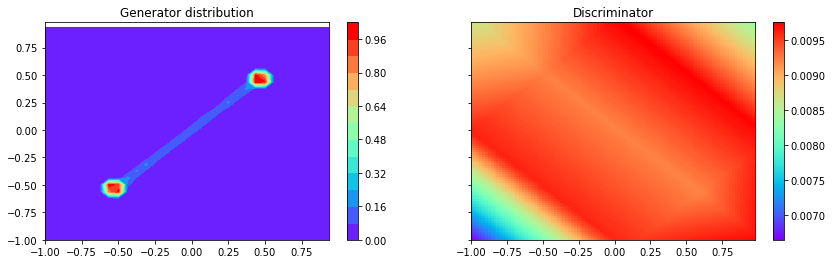

[33/100][999/1000] Loss_D: -0.00006617 Loss_G: -0.0096 D(G(z)): 0.0096


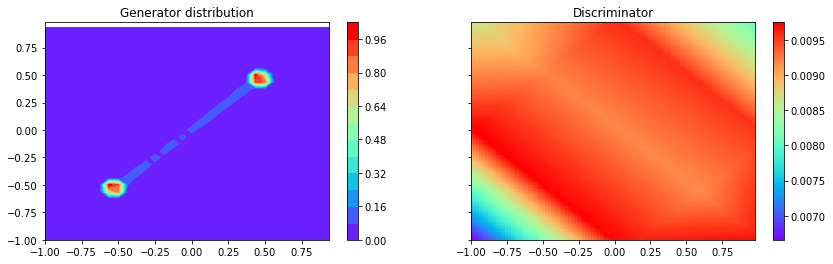

[34/100][999/1000] Loss_D: -0.00005279 Loss_G: -0.0096 D(G(z)): 0.0096


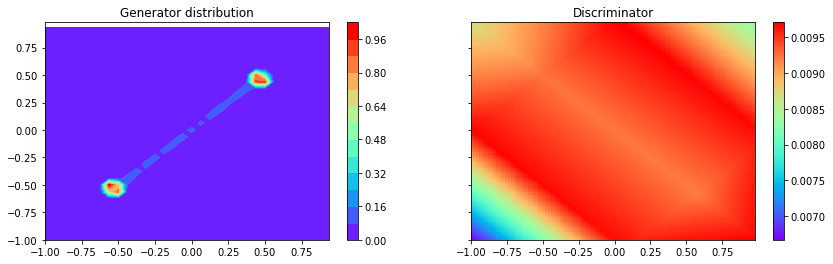

[35/100][999/1000] Loss_D: -0.00004208 Loss_G: -0.0096 D(G(z)): 0.0096


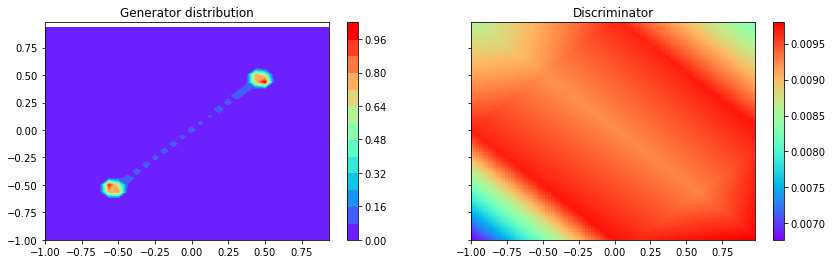

[36/100][999/1000] Loss_D: -0.00016933 Loss_G: -0.0094 D(G(z)): 0.0094


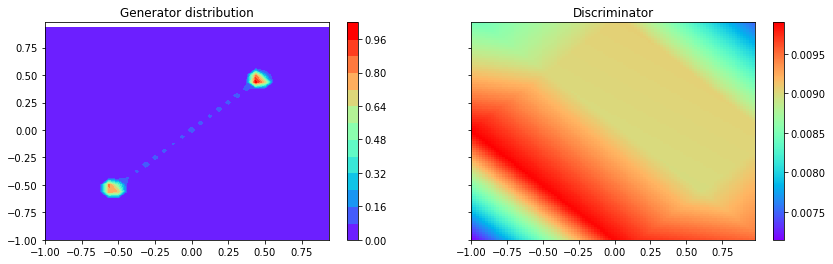

[37/100][999/1000] Loss_D: -0.00011216 Loss_G: -0.0097 D(G(z)): 0.0097


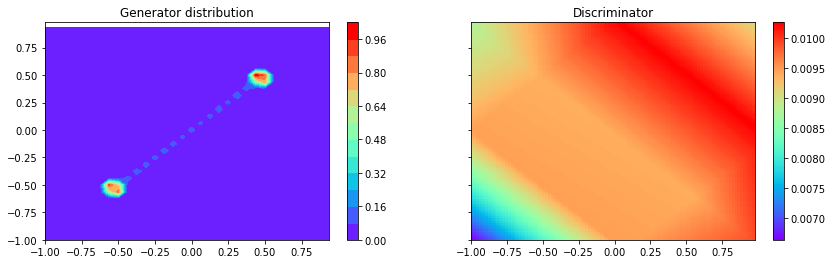

[38/100][999/1000] Loss_D: -0.00011142 Loss_G: -0.0093 D(G(z)): 0.0093


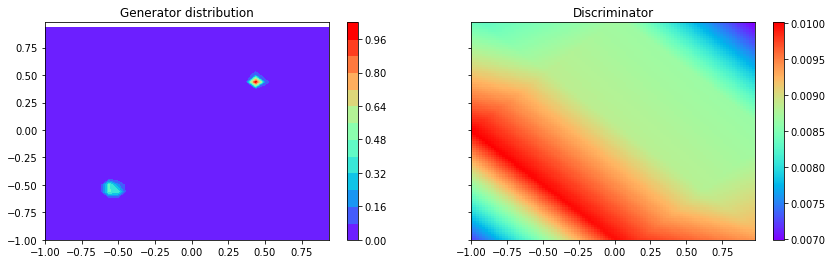

[39/100][999/1000] Loss_D: 0.00006371 Loss_G: -0.0093 D(G(z)): 0.0093


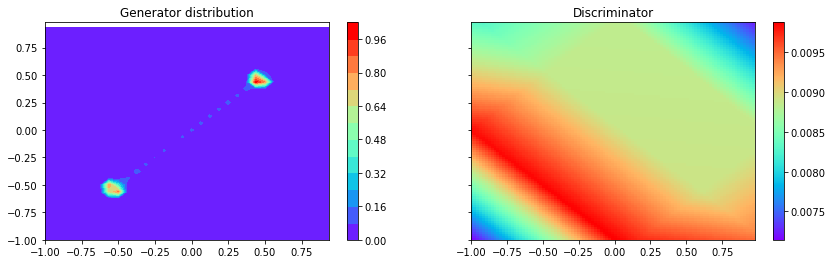

[40/100][999/1000] Loss_D: -0.00005663 Loss_G: -0.0094 D(G(z)): 0.0094


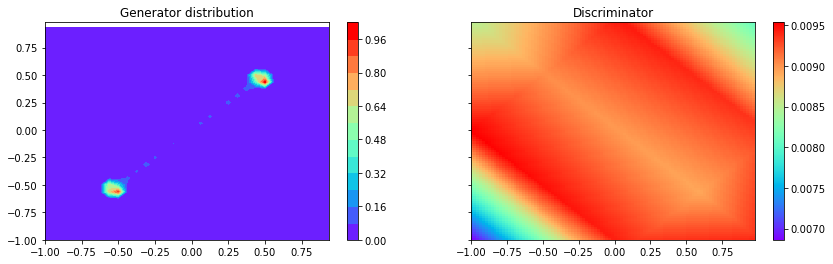

[41/100][999/1000] Loss_D: -0.00002258 Loss_G: -0.0093 D(G(z)): 0.0093


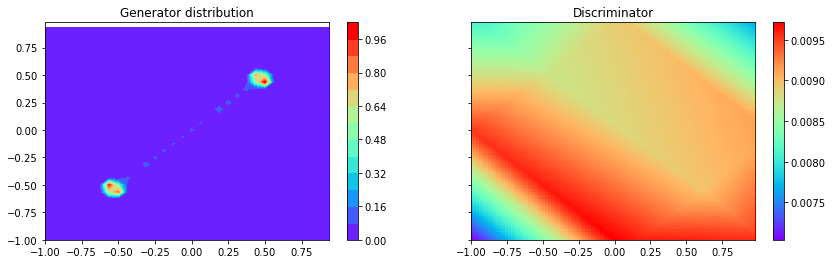

[42/100][999/1000] Loss_D: -0.00006721 Loss_G: -0.0094 D(G(z)): 0.0094


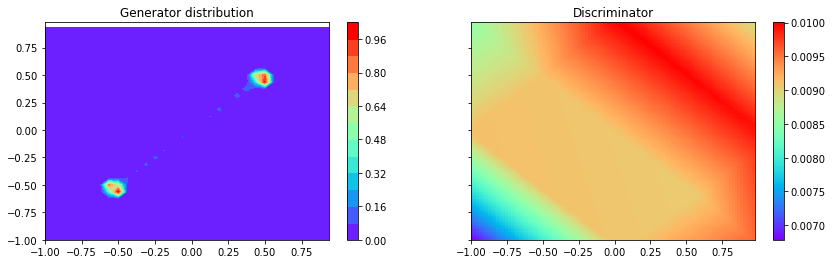

[43/100][999/1000] Loss_D: -0.00002168 Loss_G: -0.0092 D(G(z)): 0.0092


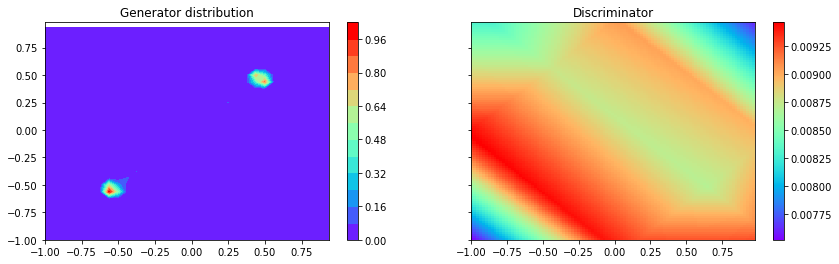

[44/100][999/1000] Loss_D: -0.00005398 Loss_G: -0.0090 D(G(z)): 0.0090


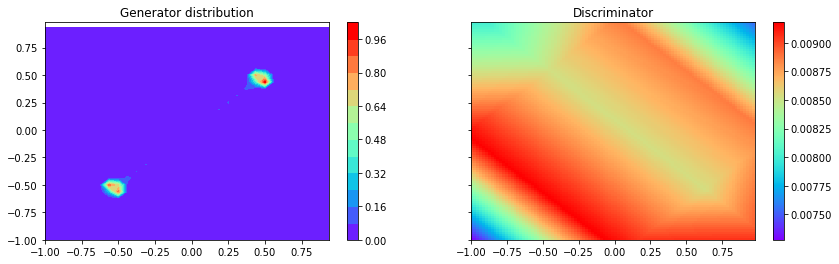

[45/100][999/1000] Loss_D: -0.00007639 Loss_G: -0.0092 D(G(z)): 0.0092


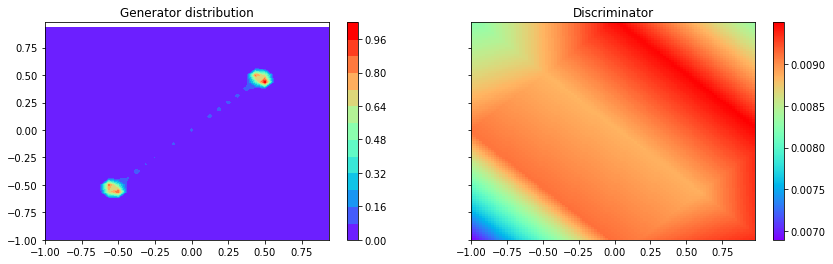

[46/100][999/1000] Loss_D: -0.00010335 Loss_G: -0.0090 D(G(z)): 0.0090


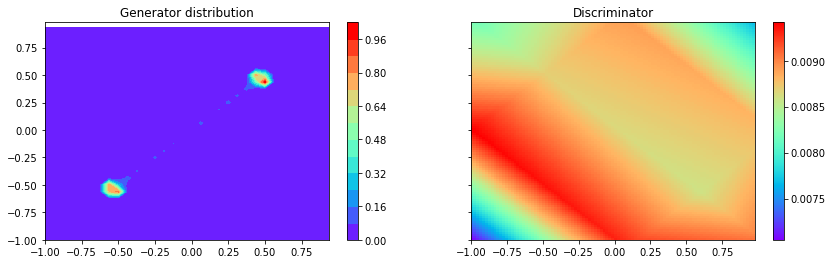

[47/100][999/1000] Loss_D: -0.00006346 Loss_G: -0.0091 D(G(z)): 0.0091


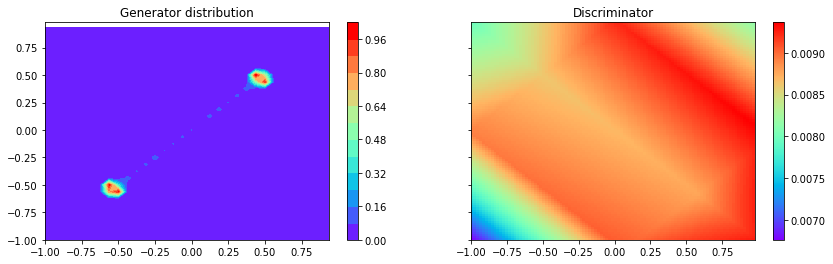

[48/100][999/1000] Loss_D: -0.00006601 Loss_G: -0.0091 D(G(z)): 0.0091


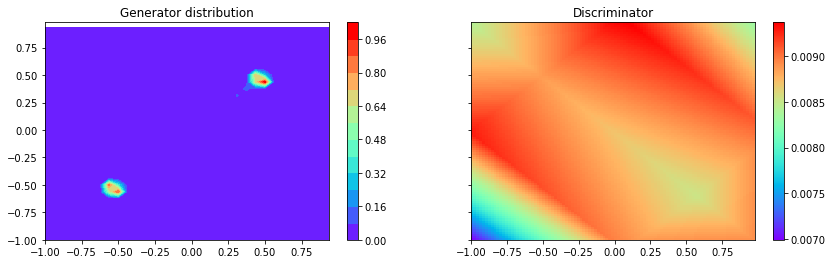

[49/100][999/1000] Loss_D: -0.00007912 Loss_G: -0.0091 D(G(z)): 0.0091


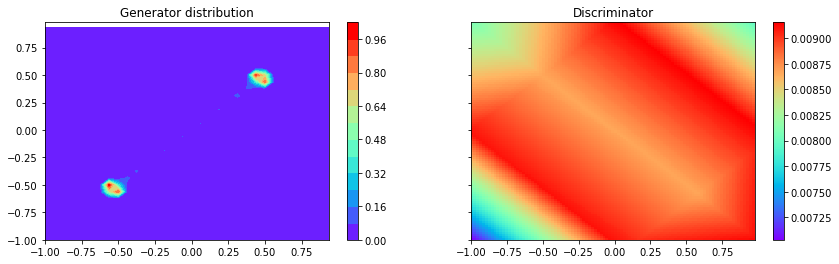

[50/100][999/1000] Loss_D: -0.00015082 Loss_G: -0.0090 D(G(z)): 0.0090


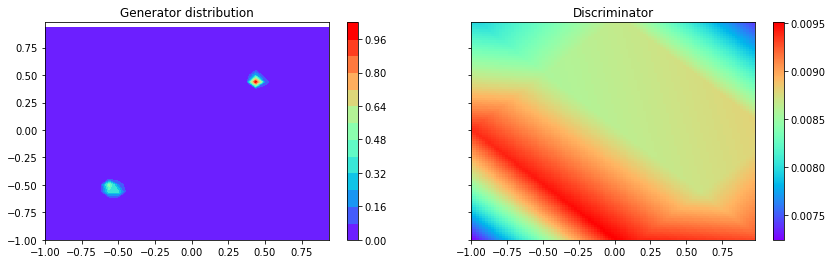

[51/100][999/1000] Loss_D: -0.00011370 Loss_G: -0.0094 D(G(z)): 0.0094


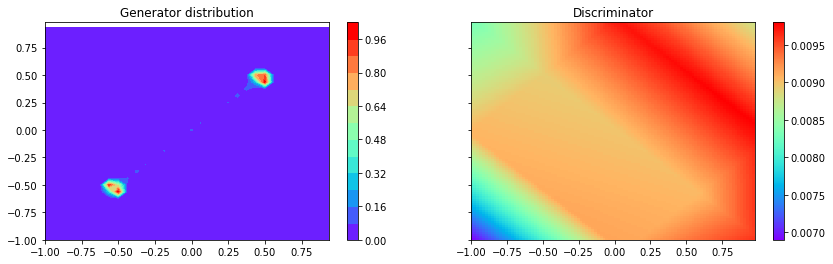

[52/100][999/1000] Loss_D: -0.00001778 Loss_G: -0.0092 D(G(z)): 0.0092


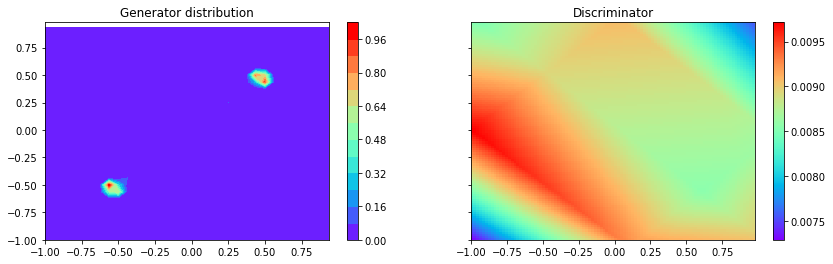

[53/100][999/1000] Loss_D: -0.00006854 Loss_G: -0.0094 D(G(z)): 0.0094


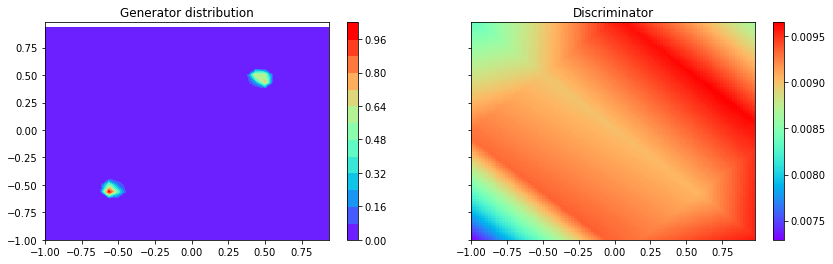

[54/100][999/1000] Loss_D: 0.00005101 Loss_G: -0.0095 D(G(z)): 0.0095


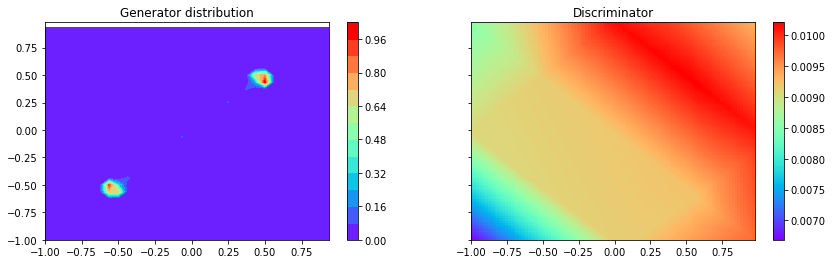

KeyboardInterrupt: 

In [14]:
for epoch in range(1, niter + 1):
    GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)
    for i in range(nElements):
        ############################
        # (1) Update D network
        ###########################
        # train with real
        for t in range(n_critic):
            netD.zero_grad()
            
            ## Real 
            real_cpu = GMutils.sample(batchSize)
            batch_size = real_cpu.size(0)
            input.data.resize_(real_cpu.size()).copy_(real_cpu)
            
            output_real = netD(input)
            
            ## Fake
            noise.data.resize_(batch_size, nz)
            noise.data.normal_(0, 1)
            fake = netG(noise).detach()
            
            output_fake = netD(fake)
            
            errD = - torch.mean(output_real) + torch.mean(output_fake)
            errD.backward()
            optimizerD.step()
                        
            # Clip
            for p in netD.parameters():
                p.data.clamp_(-c, c)

        ############################
        # (2) Update G network
        ###########################
        
        netG.zero_grad()
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = - torch.mean(output) - output.data.var()
        errG.backward()
        
        D_G_z2 = output.data.mean()
        
        optimizerG.step()
        
    print('[%d/%d][%d/%d] Loss_D: %.8f Loss_G: %.4f D(G(z)): %.4f'
              % (epoch, niter, i, nElements,
                 errD.data.sum(), errG.data[0], D_G_z2))
            
GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)

# N_critic = 1

In [24]:
batchSize = 64
nz = 10
nc = 2 # Number of outputs
ndf = 100
ngf = 100
niter = 100
nElements = 1000
lr = 0.00005
beta1 = 0.5
n_critic = 1 # Training more the discriminator

c = 0.01 # clip

In [25]:
netG = torch.nn.Sequential(
    torch.nn.Linear(nz, ngf),
    torch.nn.ReLU(),
    torch.nn.Linear(ngf, nc),
    torch.nn.Tanh()
)


netD = torch.nn.Sequential(
    torch.nn.Linear(nc, ndf),
    torch.nn.ReLU(),
    torch.nn.Linear(ndf, 1)
)

In [26]:
optimizerG = optim.RMSprop(netG.parameters(), lr = lr)
optimizerD = optim.RMSprop(netD.parameters(), lr = lr)

In [27]:
# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)

input = Variable(input)
noise = Variable(noise)

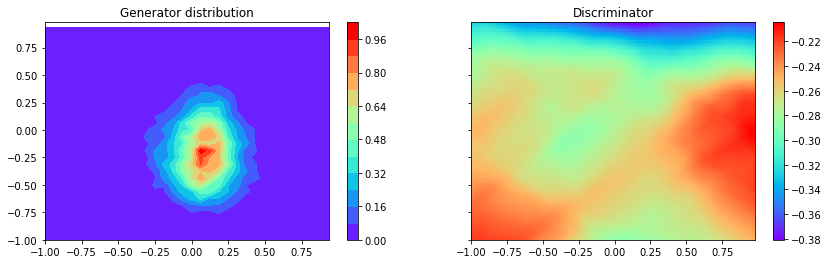

[1/100][999/1000] Loss_D: -0.00047746 Loss_G: 0.0109 D(G(z)): -0.0109


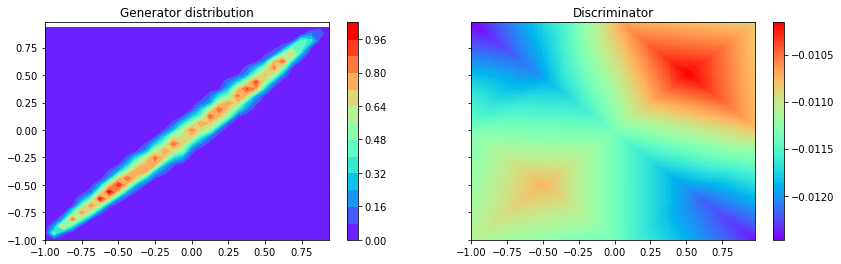

[2/100][999/1000] Loss_D: -0.00033905 Loss_G: 0.0109 D(G(z)): -0.0109


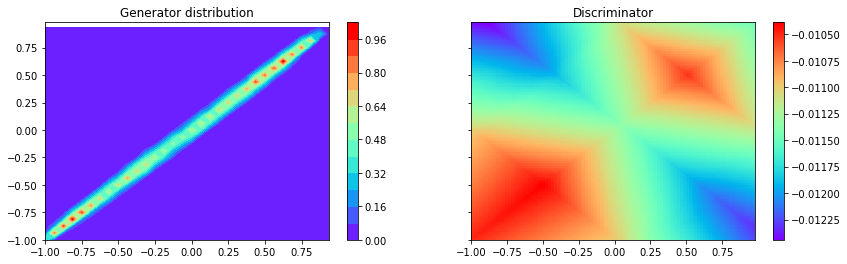

[3/100][999/1000] Loss_D: -0.00029827 Loss_G: 0.0109 D(G(z)): -0.0109


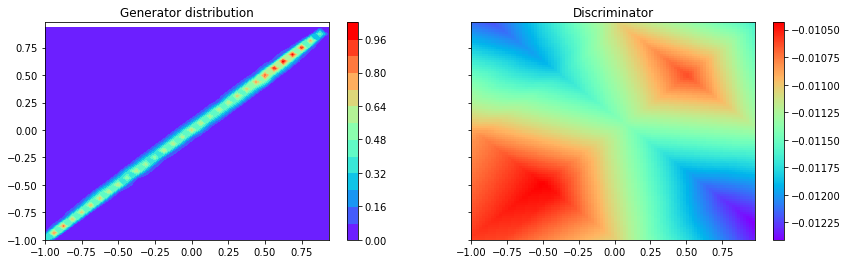

[4/100][999/1000] Loss_D: -0.00039722 Loss_G: 0.0112 D(G(z)): -0.0112


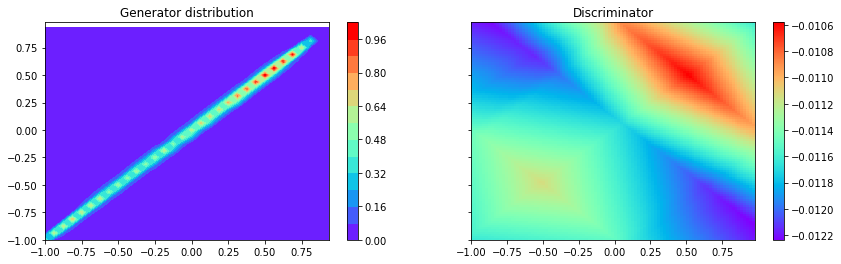

[5/100][999/1000] Loss_D: -0.00035608 Loss_G: 0.0111 D(G(z)): -0.0111


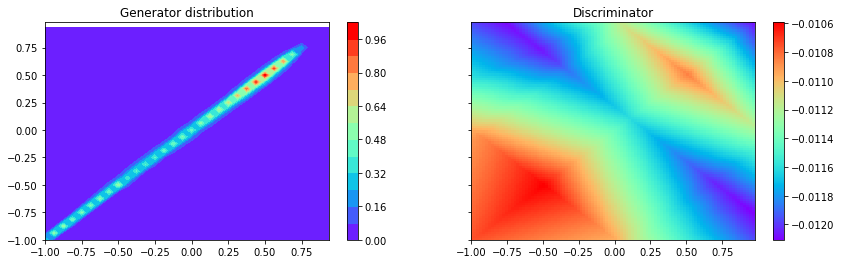

[6/100][999/1000] Loss_D: -0.00031179 Loss_G: 0.0110 D(G(z)): -0.0110


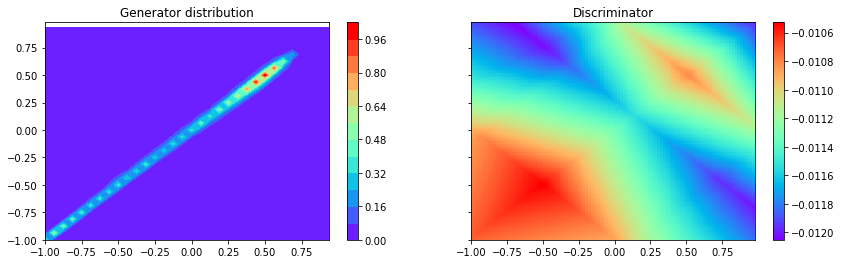

[7/100][999/1000] Loss_D: -0.00031581 Loss_G: 0.0111 D(G(z)): -0.0111


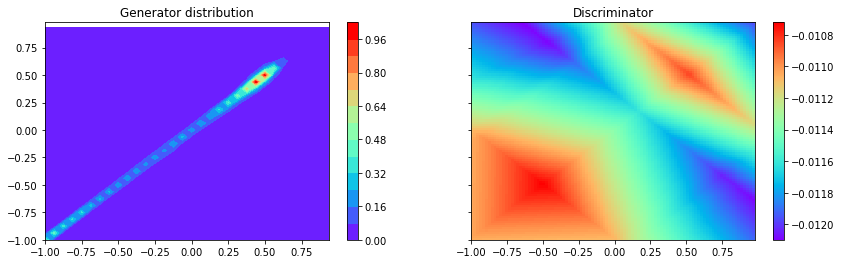

[8/100][999/1000] Loss_D: -0.00019294 Loss_G: 0.0110 D(G(z)): -0.0110


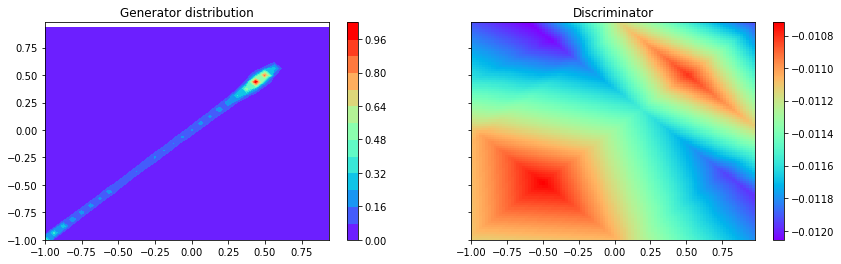

[9/100][999/1000] Loss_D: -0.00027725 Loss_G: 0.0112 D(G(z)): -0.0112


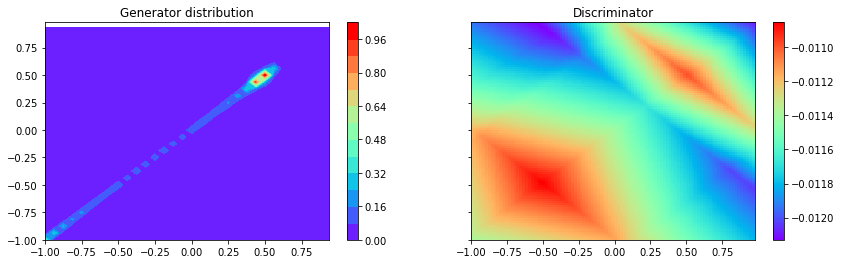

[10/100][999/1000] Loss_D: -0.00017035 Loss_G: 0.0119 D(G(z)): -0.0119


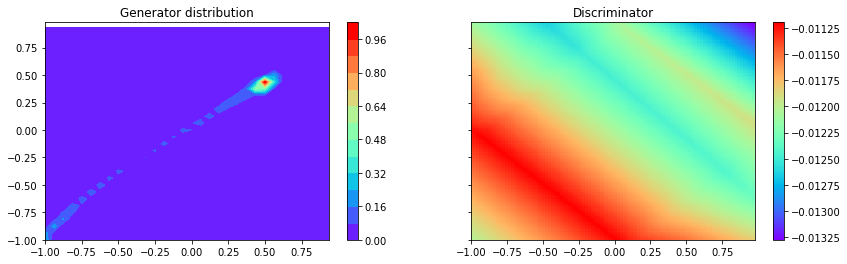

[11/100][999/1000] Loss_D: -0.00038269 Loss_G: 0.0118 D(G(z)): -0.0118


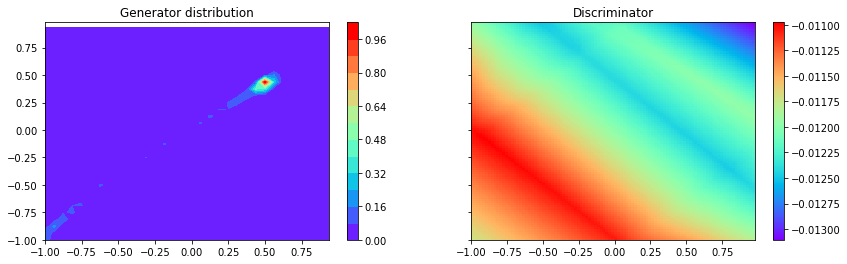

[12/100][999/1000] Loss_D: -0.00024095 Loss_G: 0.0117 D(G(z)): -0.0117


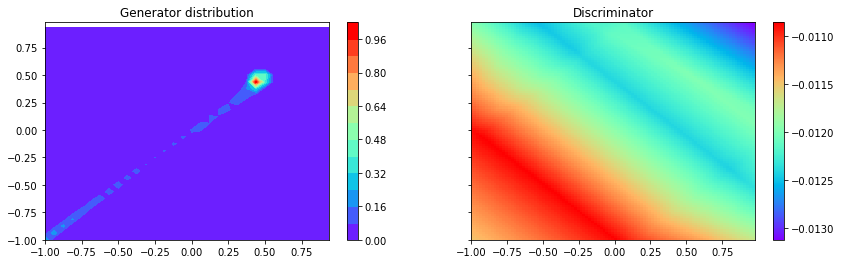

[13/100][999/1000] Loss_D: -0.00032037 Loss_G: 0.0120 D(G(z)): -0.0120


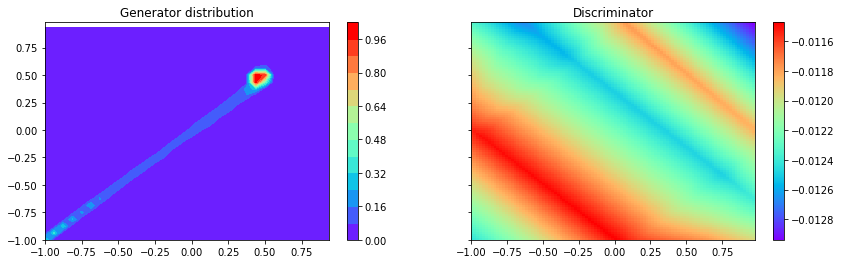

[14/100][999/1000] Loss_D: -0.00035136 Loss_G: 0.0118 D(G(z)): -0.0118


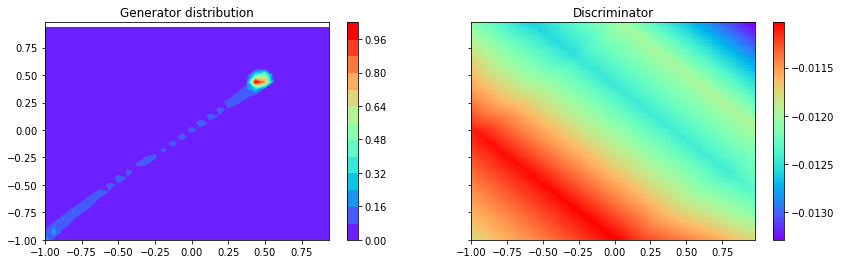

[15/100][999/1000] Loss_D: -0.00030313 Loss_G: 0.0120 D(G(z)): -0.0120


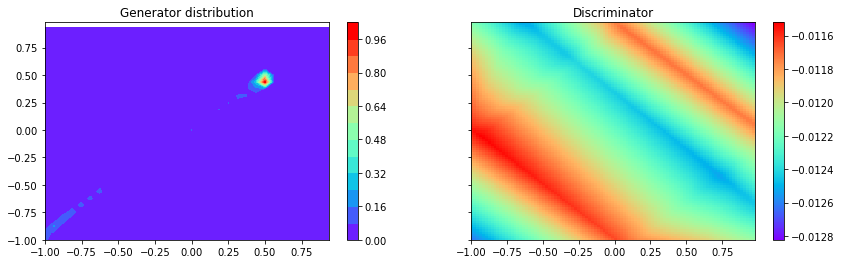

[16/100][999/1000] Loss_D: -0.00023516 Loss_G: 0.0119 D(G(z)): -0.0119


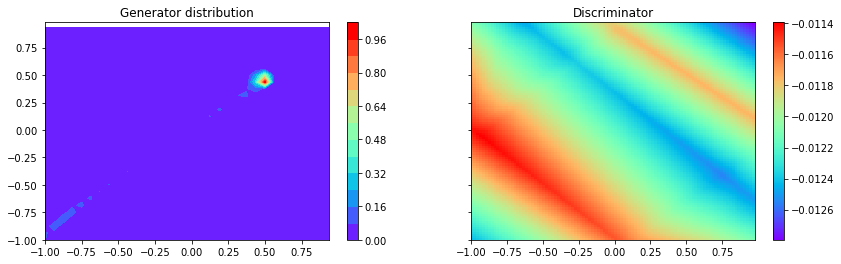

[17/100][999/1000] Loss_D: -0.00035440 Loss_G: 0.0118 D(G(z)): -0.0118


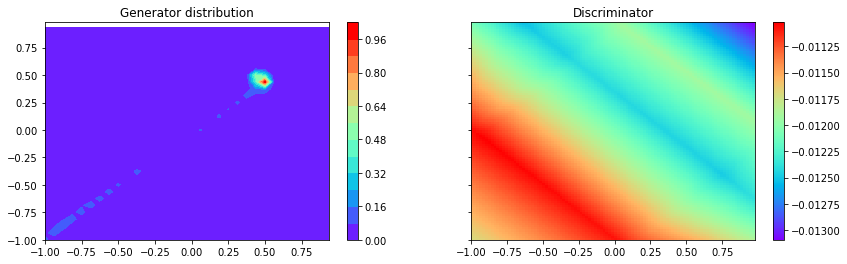

[18/100][999/1000] Loss_D: -0.00027926 Loss_G: 0.0120 D(G(z)): -0.0120


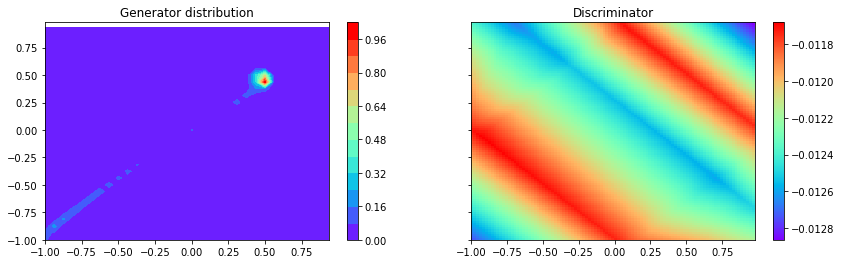

[19/100][999/1000] Loss_D: -0.00032571 Loss_G: 0.0118 D(G(z)): -0.0118


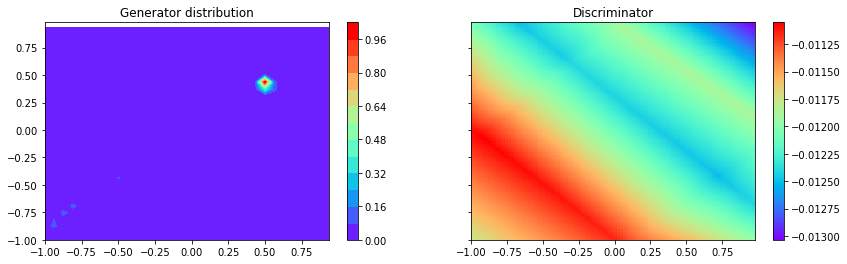

[20/100][999/1000] Loss_D: -0.00027818 Loss_G: 0.0118 D(G(z)): -0.0118


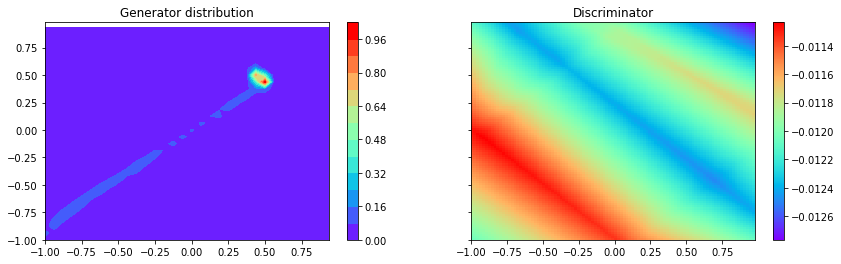

[21/100][999/1000] Loss_D: -0.00027863 Loss_G: 0.0118 D(G(z)): -0.0118


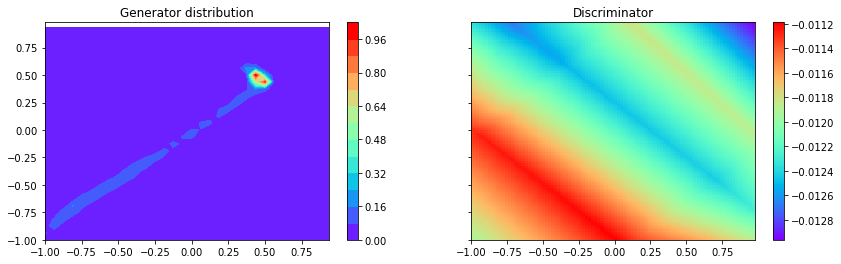

[22/100][999/1000] Loss_D: -0.00022613 Loss_G: 0.0118 D(G(z)): -0.0118


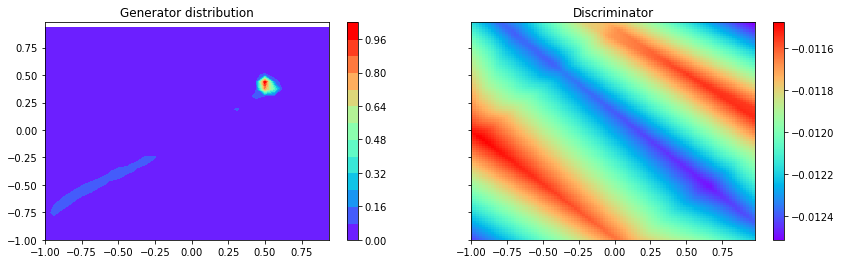

[23/100][999/1000] Loss_D: -0.00022542 Loss_G: 0.0117 D(G(z)): -0.0117


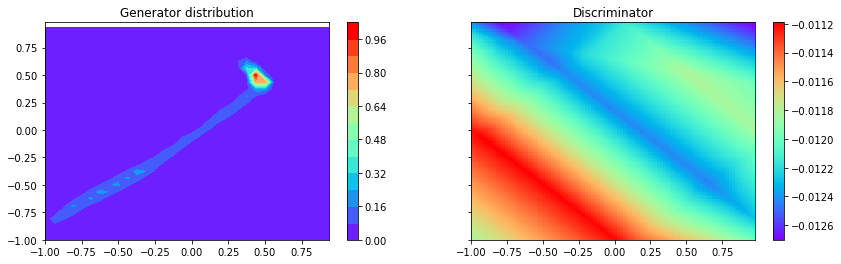

[24/100][999/1000] Loss_D: -0.00023568 Loss_G: 0.0119 D(G(z)): -0.0119


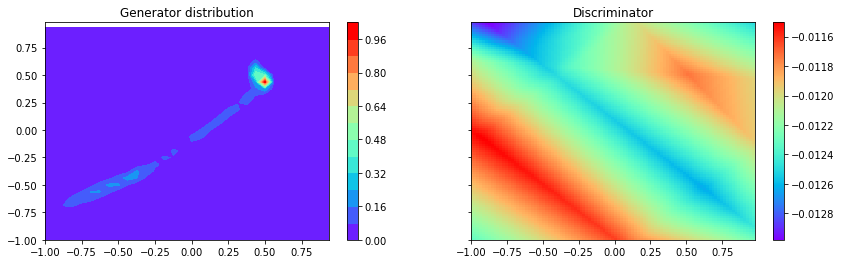

[25/100][999/1000] Loss_D: -0.00018772 Loss_G: 0.0119 D(G(z)): -0.0119


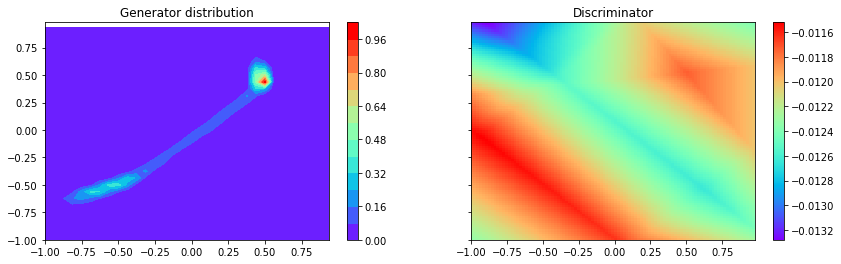

[26/100][999/1000] Loss_D: -0.00018707 Loss_G: 0.0119 D(G(z)): -0.0119


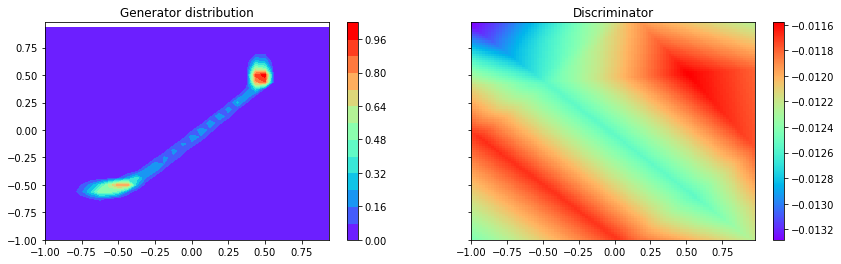

[27/100][999/1000] Loss_D: -0.00017190 Loss_G: 0.0117 D(G(z)): -0.0117


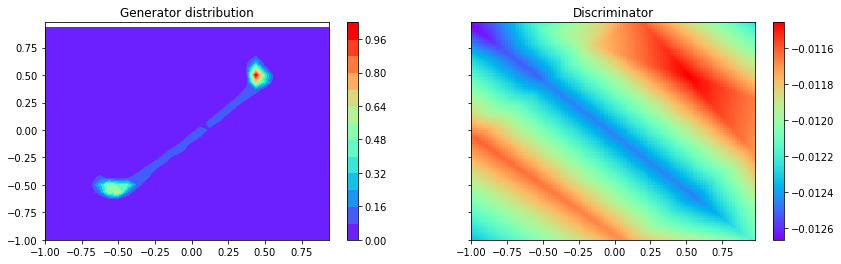

[28/100][999/1000] Loss_D: -0.00018375 Loss_G: 0.0115 D(G(z)): -0.0115


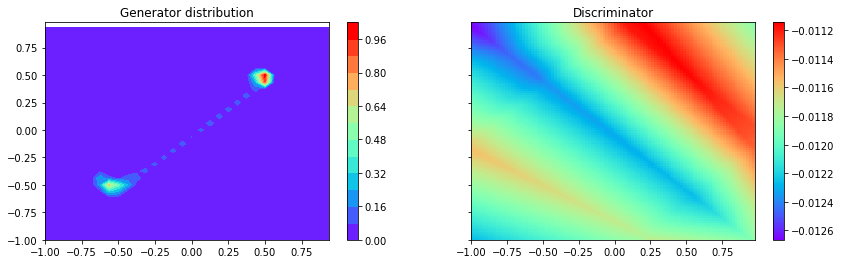

[29/100][999/1000] Loss_D: -0.00026400 Loss_G: 0.0115 D(G(z)): -0.0115


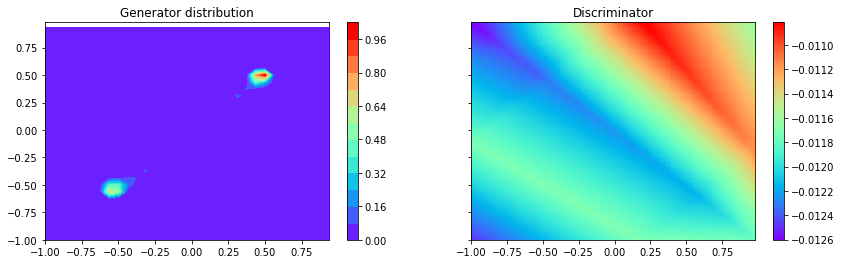

[30/100][999/1000] Loss_D: -0.00011245 Loss_G: 0.0115 D(G(z)): -0.0115


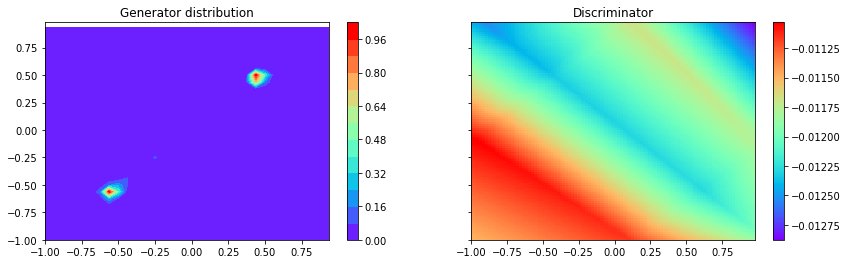

[31/100][999/1000] Loss_D: -0.00017804 Loss_G: 0.0117 D(G(z)): -0.0117


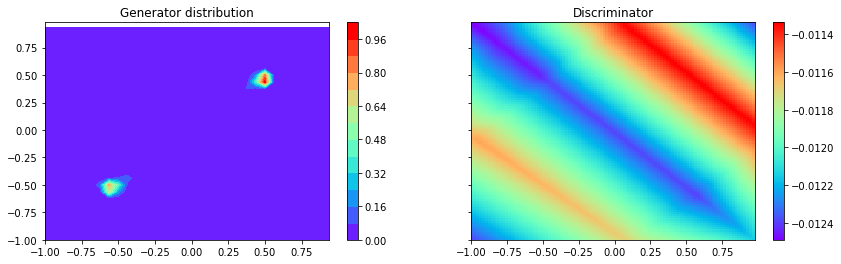

[32/100][999/1000] Loss_D: -0.00014505 Loss_G: 0.0116 D(G(z)): -0.0116


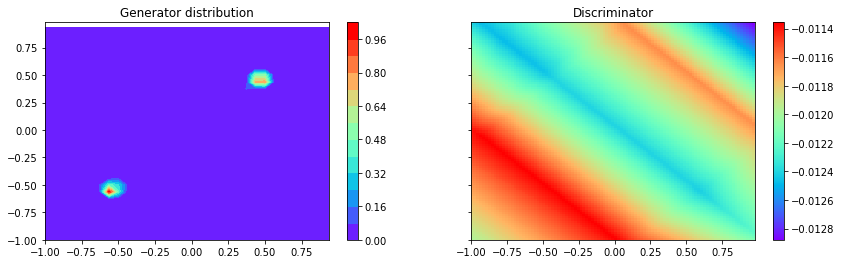

[33/100][999/1000] Loss_D: -0.00012811 Loss_G: 0.0116 D(G(z)): -0.0116


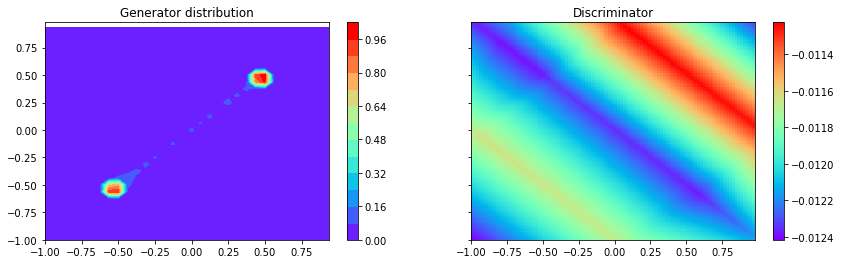

[34/100][999/1000] Loss_D: -0.00011928 Loss_G: 0.0117 D(G(z)): -0.0117


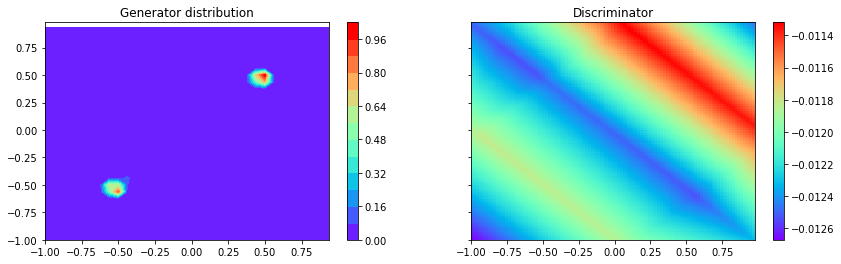

[35/100][999/1000] Loss_D: -0.00008043 Loss_G: 0.0117 D(G(z)): -0.0117


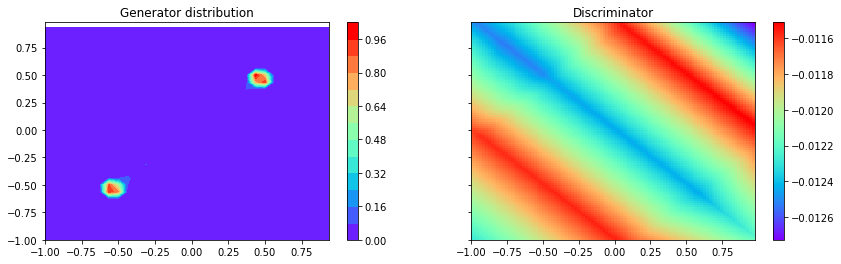

[36/100][999/1000] Loss_D: -0.00016195 Loss_G: 0.0116 D(G(z)): -0.0116


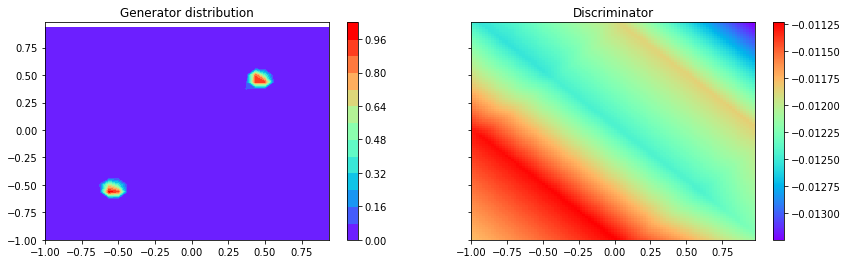

[37/100][999/1000] Loss_D: -0.00007408 Loss_G: 0.0115 D(G(z)): -0.0115


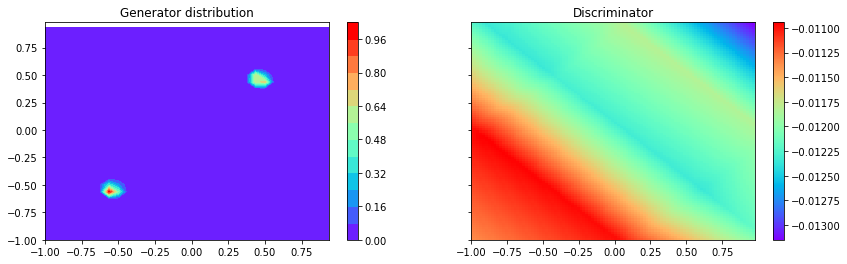

[38/100][999/1000] Loss_D: -0.00001152 Loss_G: 0.0115 D(G(z)): -0.0115


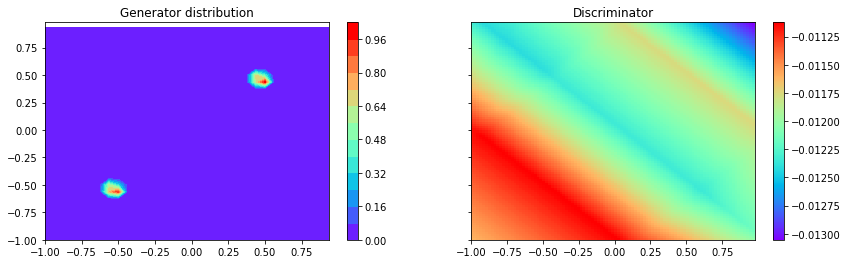

[39/100][999/1000] Loss_D: -0.00007125 Loss_G: 0.0115 D(G(z)): -0.0115


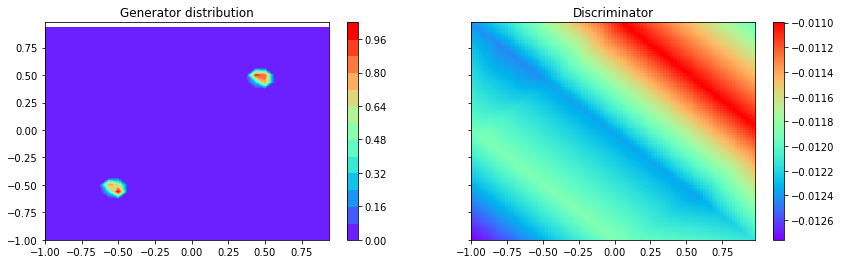

[40/100][999/1000] Loss_D: -0.00012590 Loss_G: 0.0116 D(G(z)): -0.0116


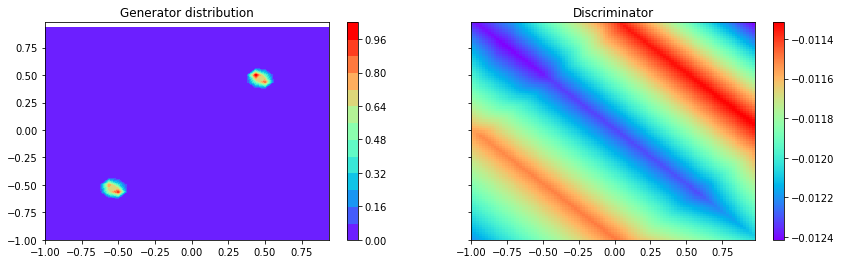

[41/100][999/1000] Loss_D: -0.00010497 Loss_G: 0.0116 D(G(z)): -0.0116


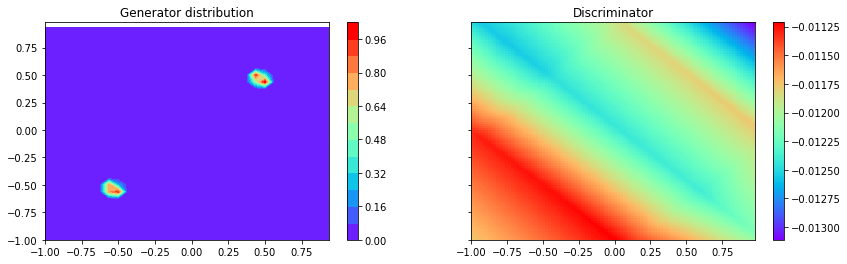

[42/100][999/1000] Loss_D: -0.00022962 Loss_G: 0.0116 D(G(z)): -0.0116


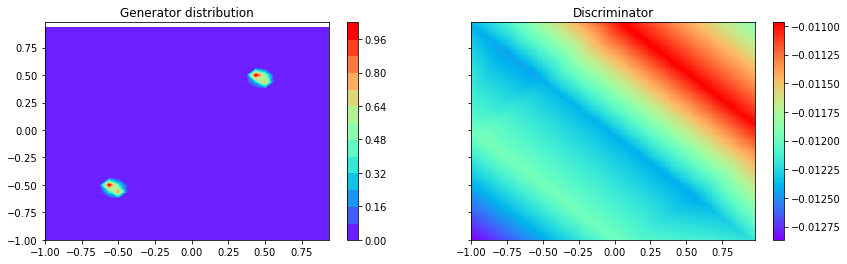

[43/100][999/1000] Loss_D: -0.00012214 Loss_G: 0.0117 D(G(z)): -0.0117


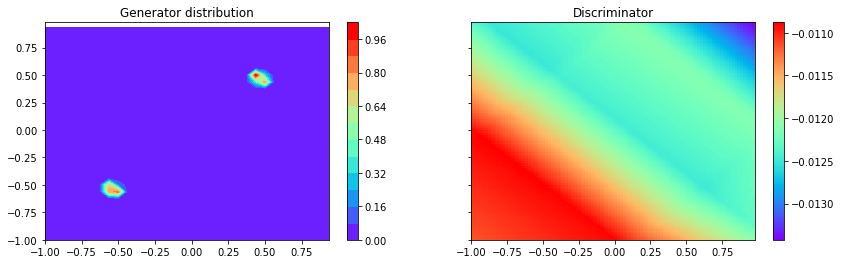

[44/100][999/1000] Loss_D: -0.00002471 Loss_G: 0.0116 D(G(z)): -0.0116


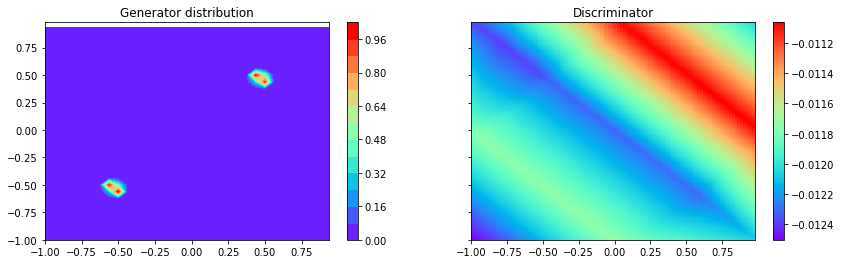

[45/100][999/1000] Loss_D: -0.00008273 Loss_G: 0.0115 D(G(z)): -0.0115


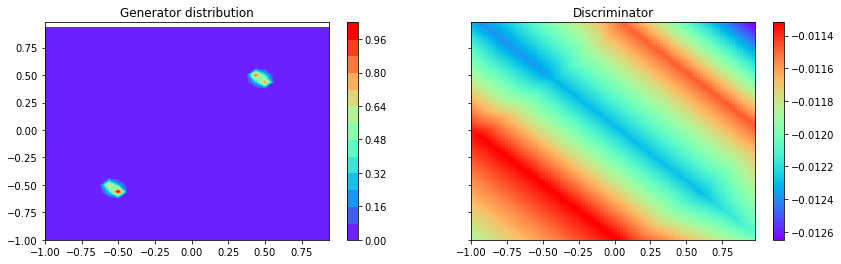

[46/100][999/1000] Loss_D: -0.00015336 Loss_G: 0.0114 D(G(z)): -0.0114


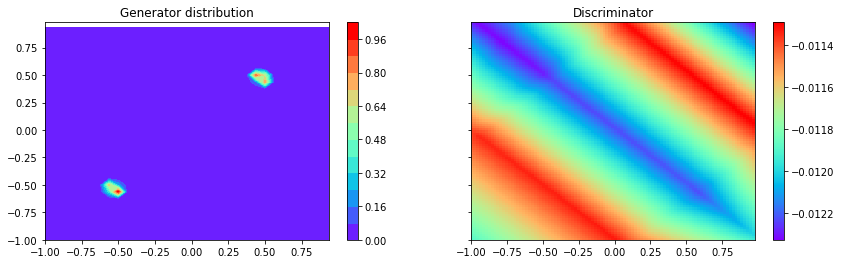

[47/100][999/1000] Loss_D: -0.00006483 Loss_G: 0.0114 D(G(z)): -0.0114


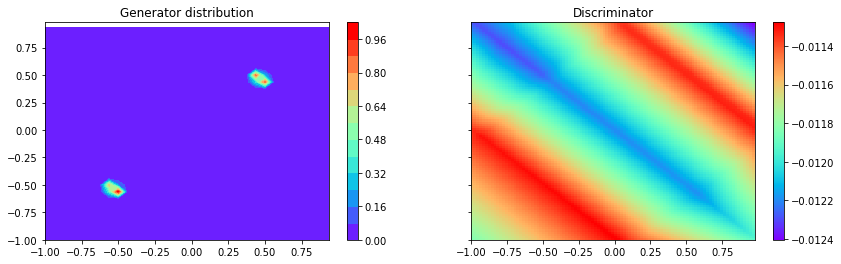

[48/100][999/1000] Loss_D: -0.00006883 Loss_G: 0.0114 D(G(z)): -0.0114


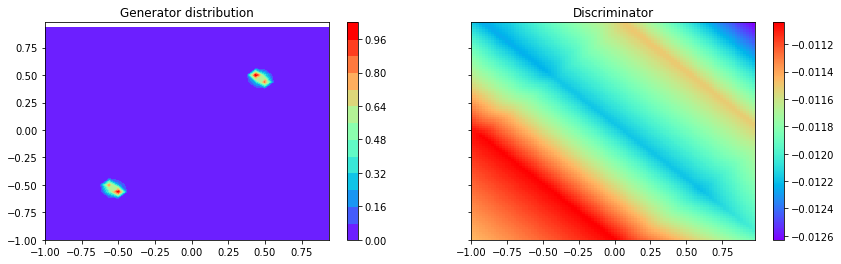

[49/100][999/1000] Loss_D: -0.00006650 Loss_G: 0.0114 D(G(z)): -0.0114


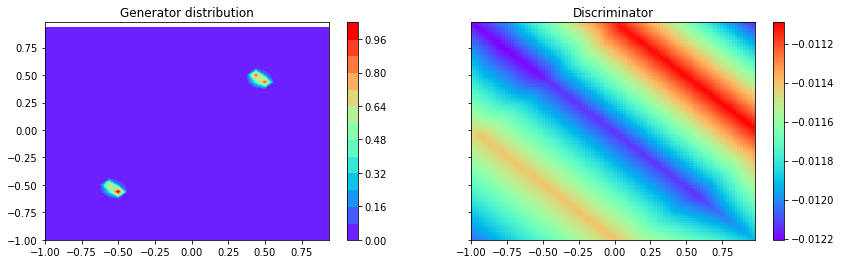

[50/100][999/1000] Loss_D: -0.00007225 Loss_G: 0.0114 D(G(z)): -0.0114


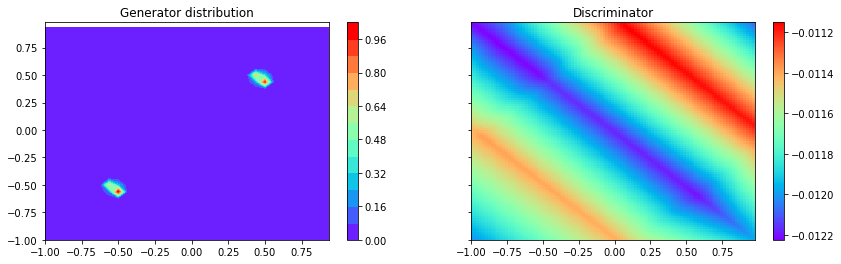

[51/100][999/1000] Loss_D: -0.00004479 Loss_G: 0.0114 D(G(z)): -0.0114


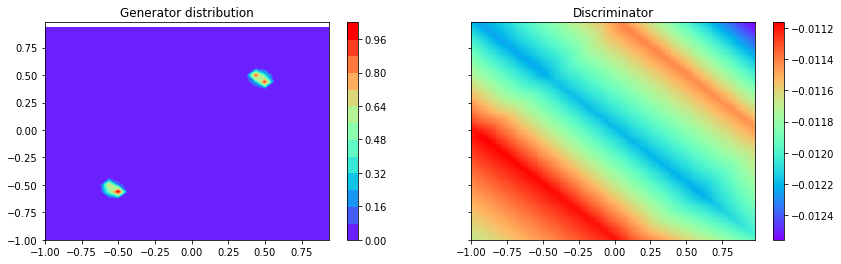

[52/100][999/1000] Loss_D: -0.00009303 Loss_G: 0.0113 D(G(z)): -0.0113


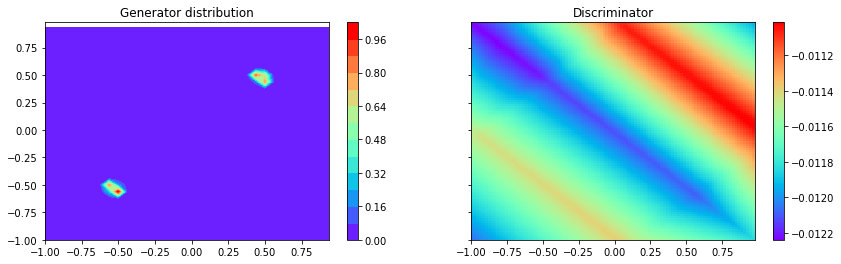

[53/100][999/1000] Loss_D: -0.00005781 Loss_G: 0.0113 D(G(z)): -0.0113


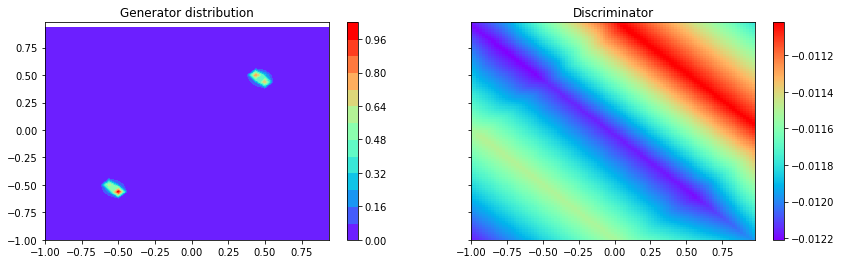

[54/100][999/1000] Loss_D: -0.00006791 Loss_G: 0.0113 D(G(z)): -0.0113


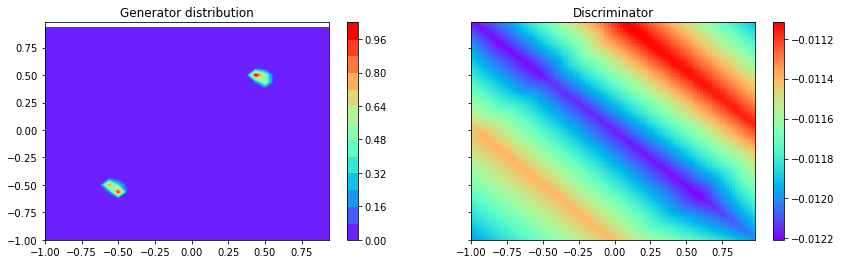

[55/100][999/1000] Loss_D: -0.00005929 Loss_G: 0.0113 D(G(z)): -0.0113


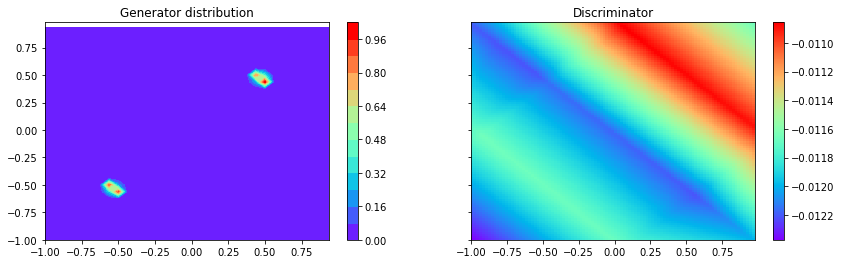

[56/100][999/1000] Loss_D: -0.00004926 Loss_G: 0.0113 D(G(z)): -0.0113


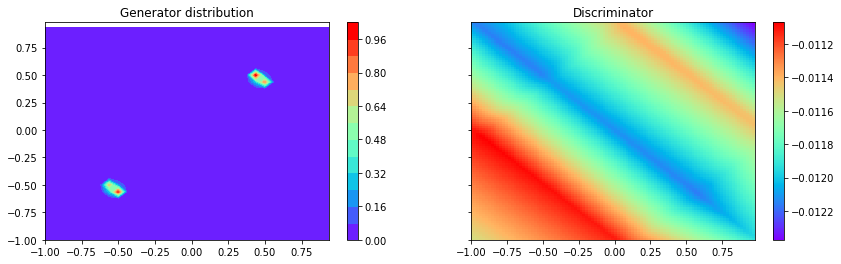

[57/100][999/1000] Loss_D: -0.00010588 Loss_G: 0.0113 D(G(z)): -0.0113


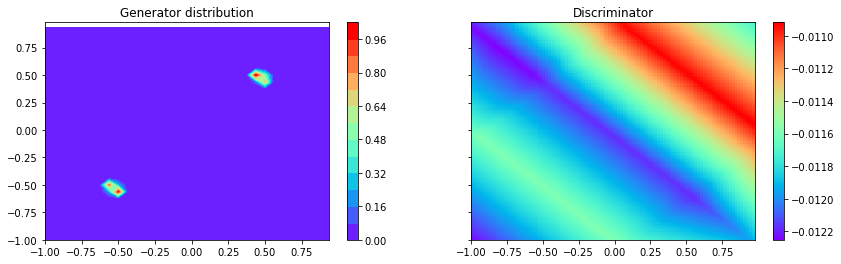

[58/100][999/1000] Loss_D: -0.00006805 Loss_G: 0.0112 D(G(z)): -0.0112


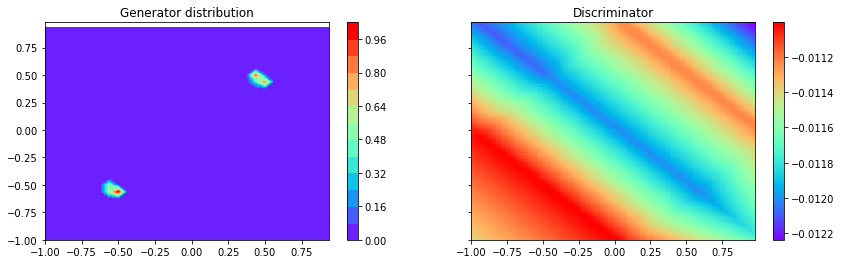

[59/100][999/1000] Loss_D: -0.00006281 Loss_G: 0.0113 D(G(z)): -0.0113


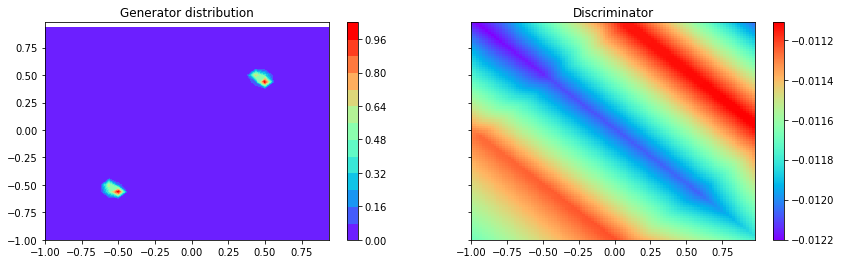

[60/100][999/1000] Loss_D: -0.00004477 Loss_G: 0.0113 D(G(z)): -0.0113


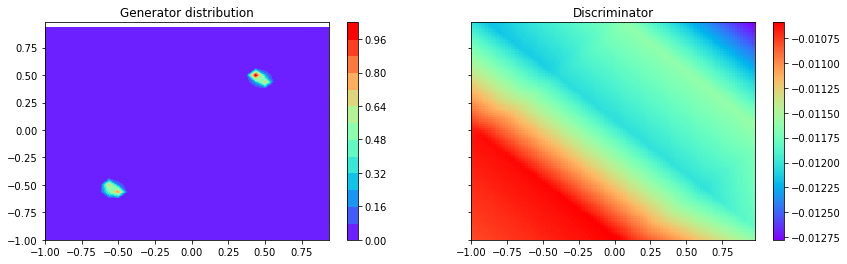

[61/100][999/1000] Loss_D: -0.00008227 Loss_G: 0.0113 D(G(z)): -0.0113


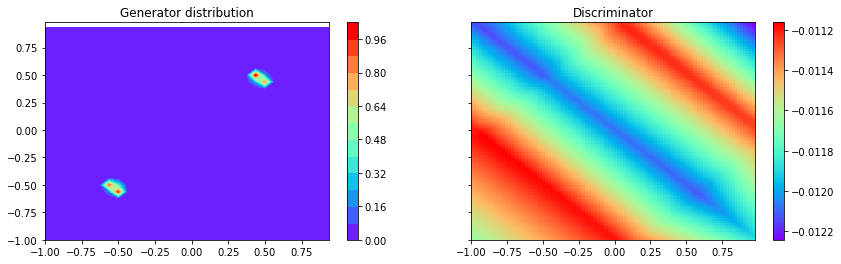

[62/100][999/1000] Loss_D: -0.00013993 Loss_G: 0.0113 D(G(z)): -0.0113


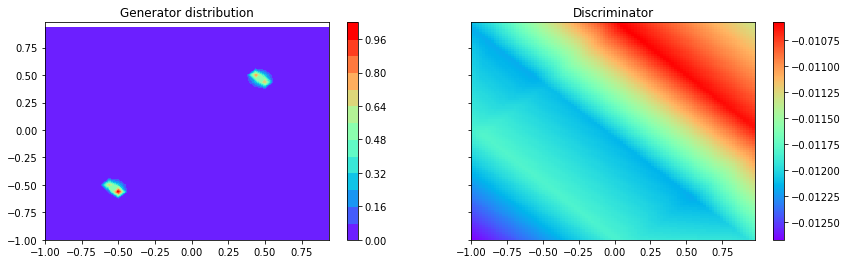

[63/100][999/1000] Loss_D: 0.00017797 Loss_G: 0.0112 D(G(z)): -0.0112


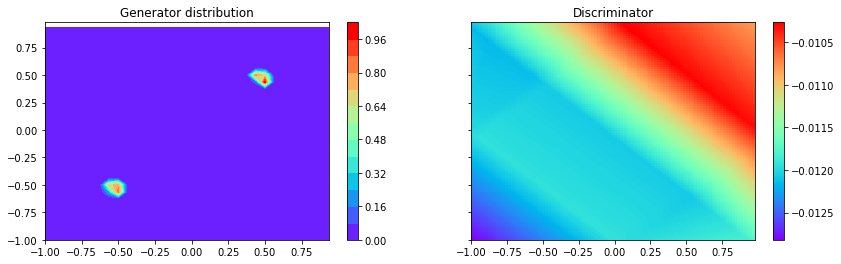

[64/100][999/1000] Loss_D: -0.00008084 Loss_G: 0.0113 D(G(z)): -0.0113


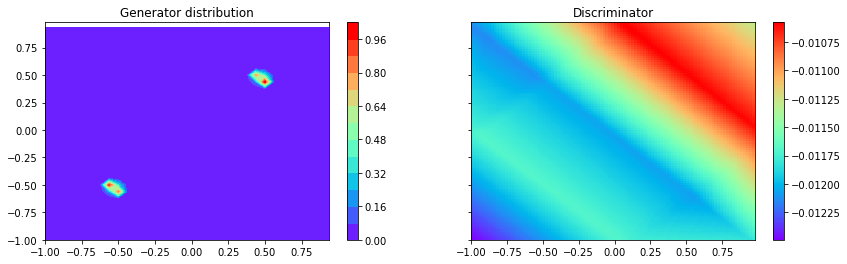

[65/100][999/1000] Loss_D: -0.00014155 Loss_G: 0.0114 D(G(z)): -0.0114


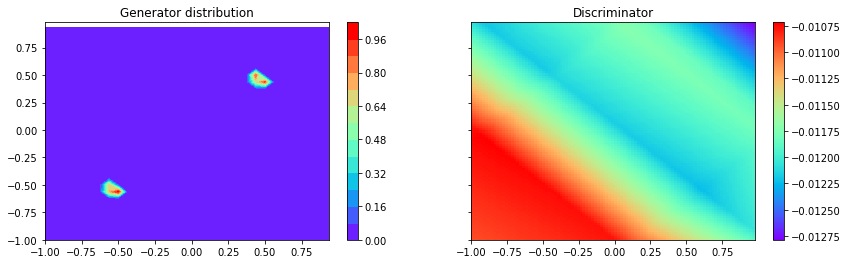

[66/100][999/1000] Loss_D: -0.00015611 Loss_G: 0.0111 D(G(z)): -0.0111


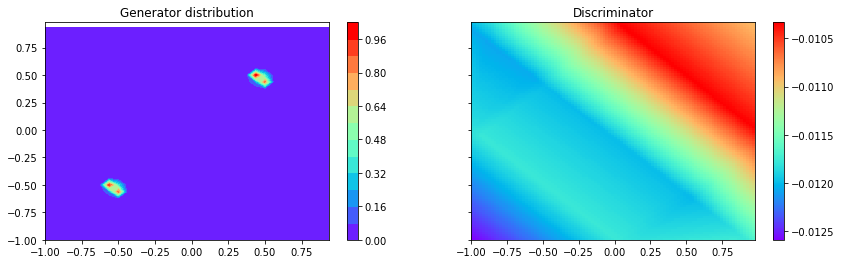

[67/100][999/1000] Loss_D: -0.00002543 Loss_G: 0.0111 D(G(z)): -0.0111


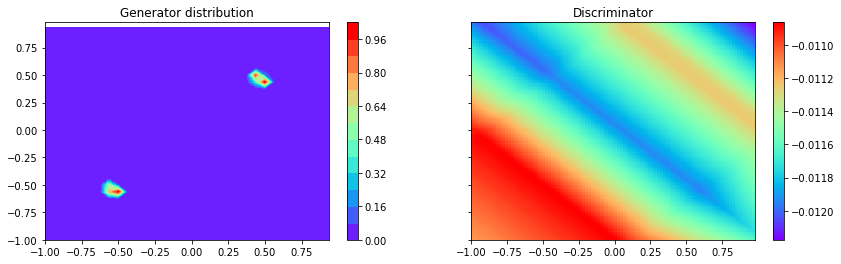

[68/100][999/1000] Loss_D: -0.00009038 Loss_G: 0.0113 D(G(z)): -0.0113


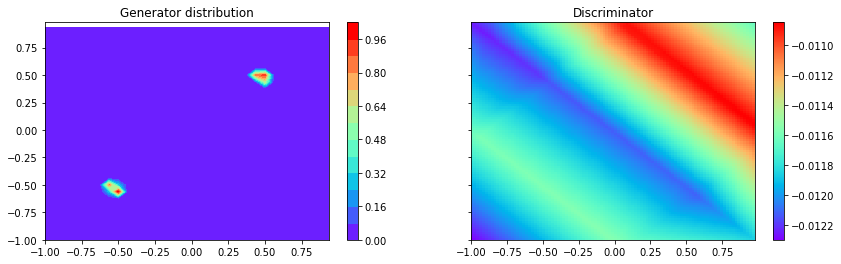

[69/100][999/1000] Loss_D: -0.00005695 Loss_G: 0.0111 D(G(z)): -0.0111


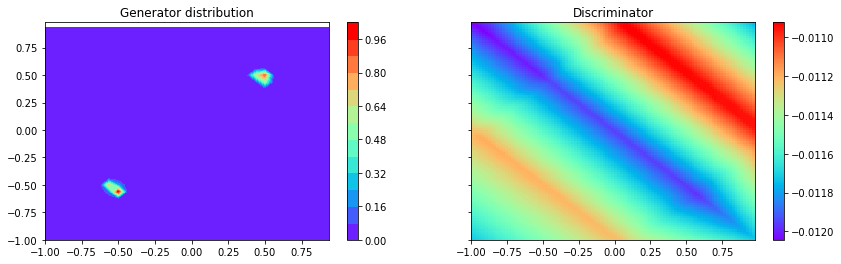

[70/100][999/1000] Loss_D: -0.00004180 Loss_G: 0.0112 D(G(z)): -0.0112


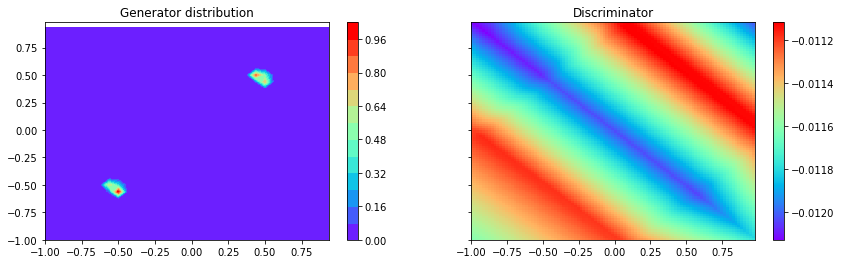

[71/100][999/1000] Loss_D: -0.00006029 Loss_G: 0.0111 D(G(z)): -0.0111


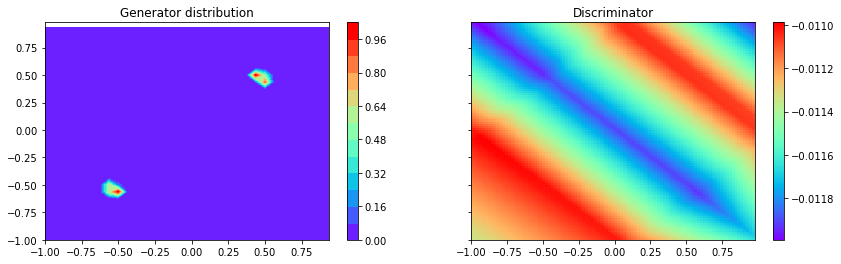

[72/100][999/1000] Loss_D: 0.00002086 Loss_G: 0.0112 D(G(z)): -0.0112


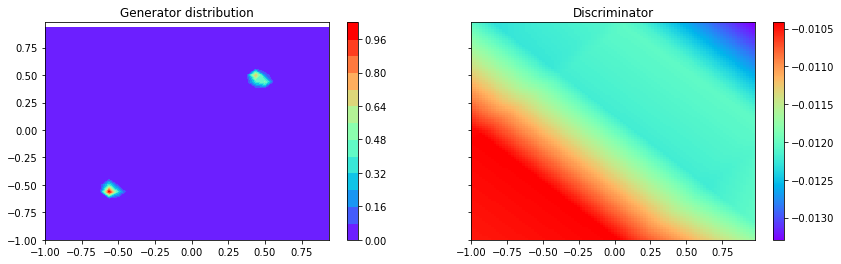

[73/100][999/1000] Loss_D: 0.00005675 Loss_G: 0.0112 D(G(z)): -0.0112


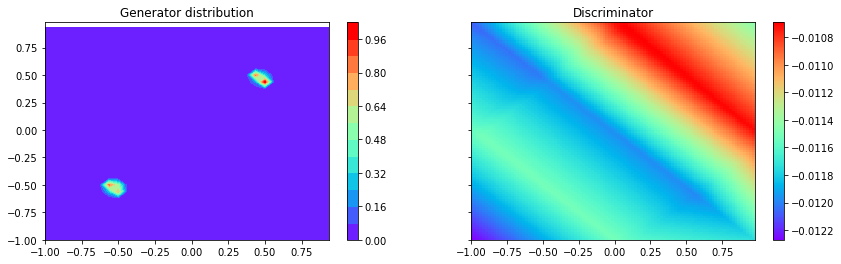

[74/100][999/1000] Loss_D: -0.00003463 Loss_G: 0.0110 D(G(z)): -0.0110


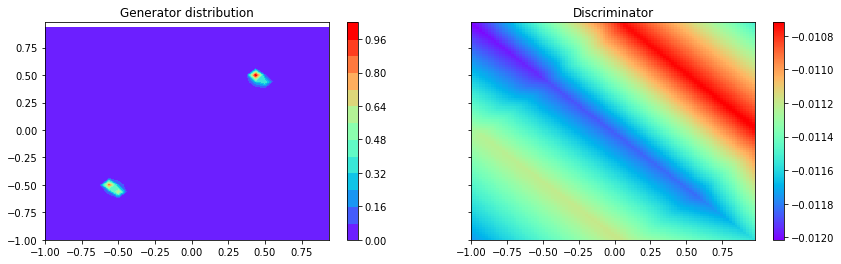

[75/100][999/1000] Loss_D: -0.00001282 Loss_G: 0.0112 D(G(z)): -0.0112


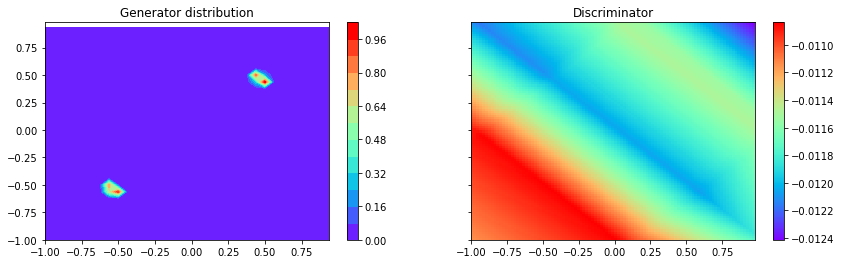

[76/100][999/1000] Loss_D: -0.00003682 Loss_G: 0.0111 D(G(z)): -0.0111


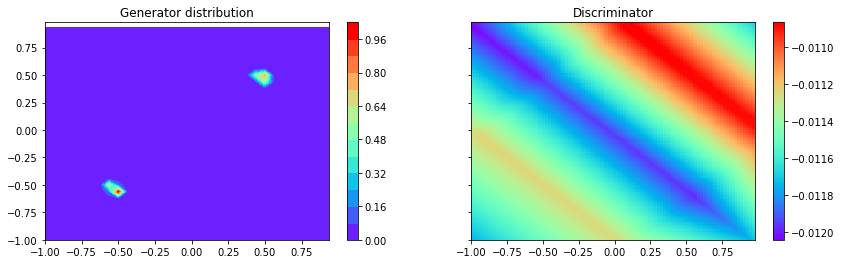

[77/100][999/1000] Loss_D: -0.00024489 Loss_G: 0.0110 D(G(z)): -0.0110


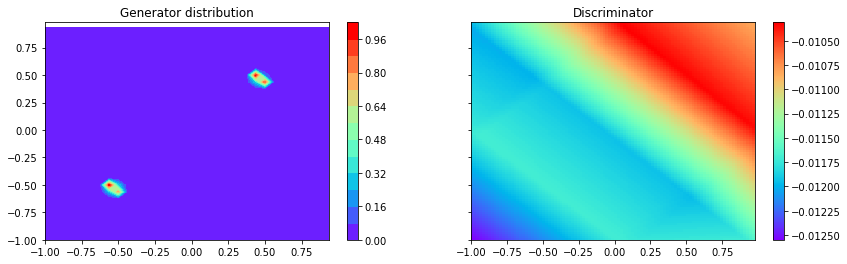

[78/100][999/1000] Loss_D: 0.00001388 Loss_G: 0.0112 D(G(z)): -0.0112


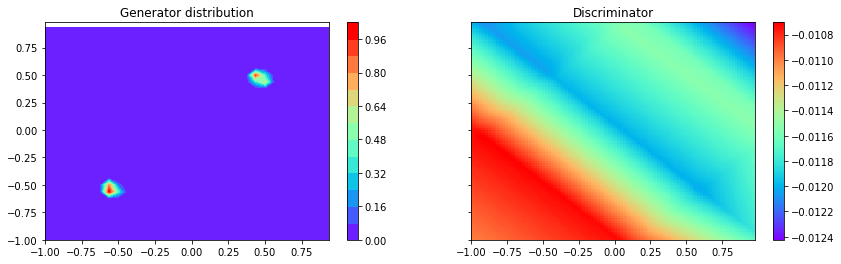

[79/100][999/1000] Loss_D: -0.00010357 Loss_G: 0.0110 D(G(z)): -0.0110


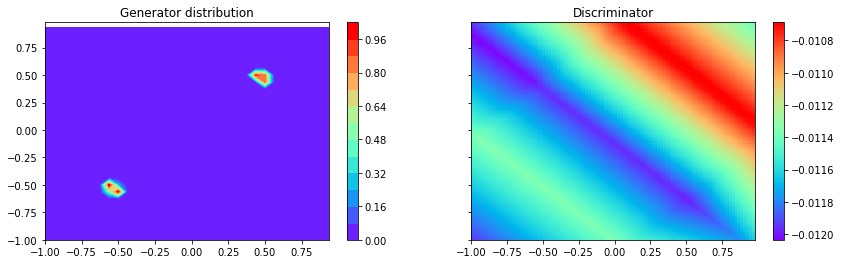

[80/100][999/1000] Loss_D: -0.00009590 Loss_G: 0.0112 D(G(z)): -0.0112


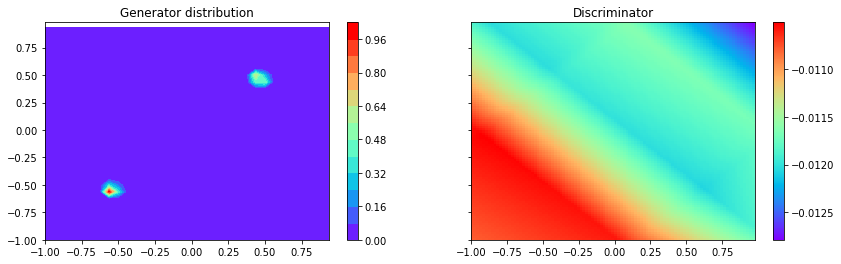

[81/100][999/1000] Loss_D: 0.00004959 Loss_G: 0.0110 D(G(z)): -0.0110


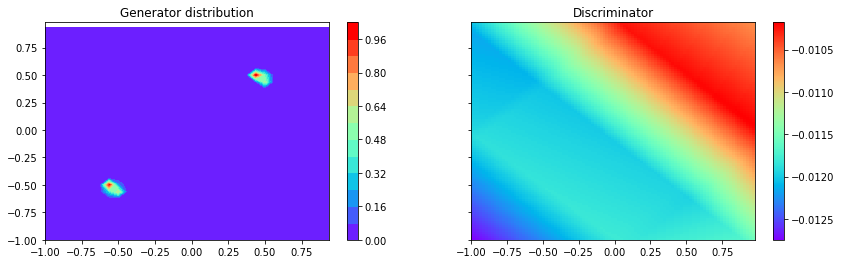

[82/100][999/1000] Loss_D: -0.00005170 Loss_G: 0.0110 D(G(z)): -0.0110


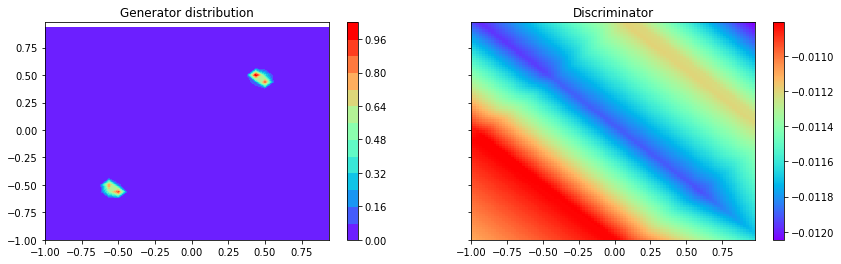

[83/100][999/1000] Loss_D: -0.00005097 Loss_G: 0.0110 D(G(z)): -0.0110


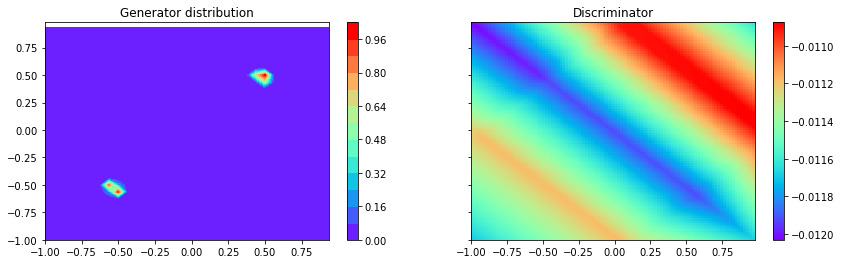

[84/100][999/1000] Loss_D: -0.00004647 Loss_G: 0.0110 D(G(z)): -0.0110


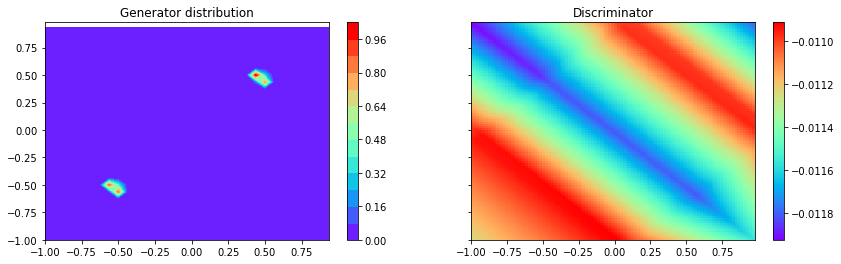

[85/100][999/1000] Loss_D: 0.00004193 Loss_G: 0.0109 D(G(z)): -0.0109


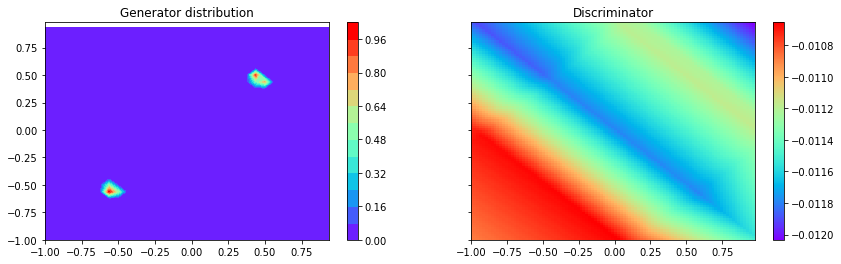

[86/100][999/1000] Loss_D: -0.00012646 Loss_G: 0.0109 D(G(z)): -0.0109


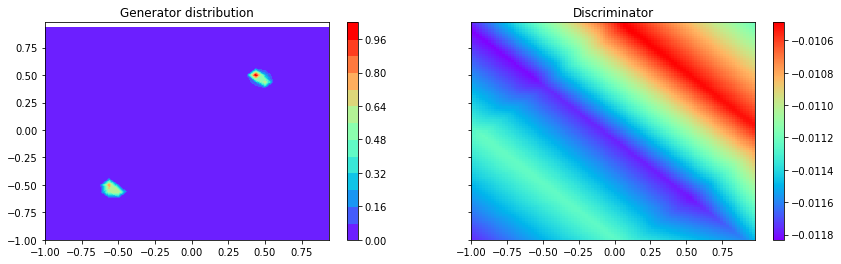

[87/100][999/1000] Loss_D: -0.00000794 Loss_G: 0.0108 D(G(z)): -0.0108


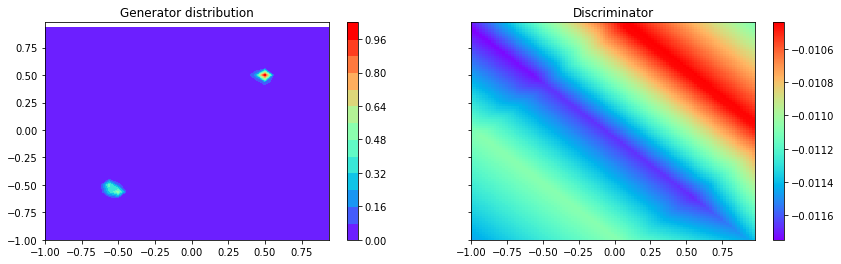

[88/100][999/1000] Loss_D: -0.00006282 Loss_G: 0.0108 D(G(z)): -0.0108


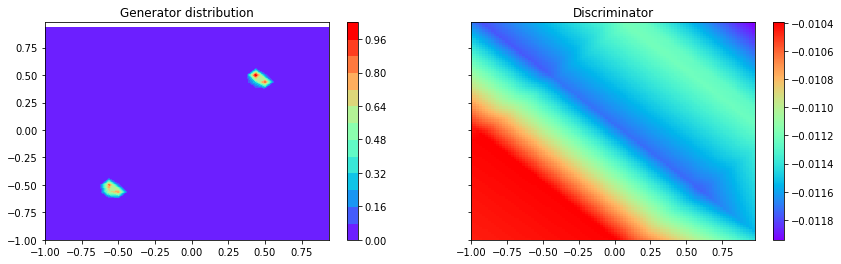

[89/100][999/1000] Loss_D: -0.00005582 Loss_G: 0.0111 D(G(z)): -0.0111


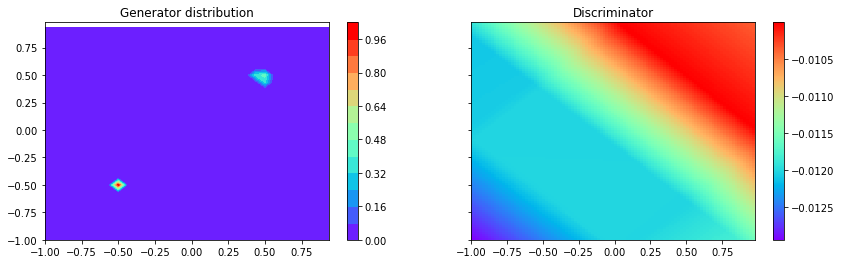

[90/100][999/1000] Loss_D: -0.00000100 Loss_G: 0.0111 D(G(z)): -0.0111


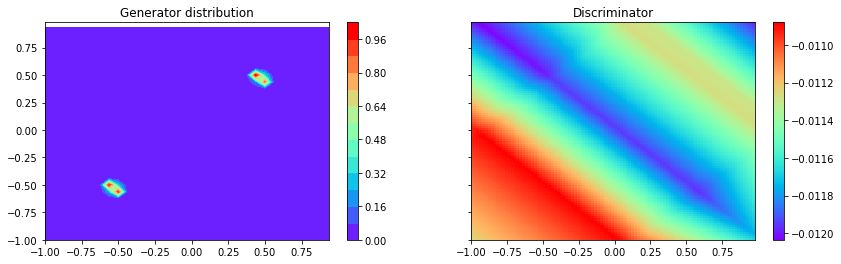

[91/100][999/1000] Loss_D: -0.00000416 Loss_G: 0.0111 D(G(z)): -0.0111


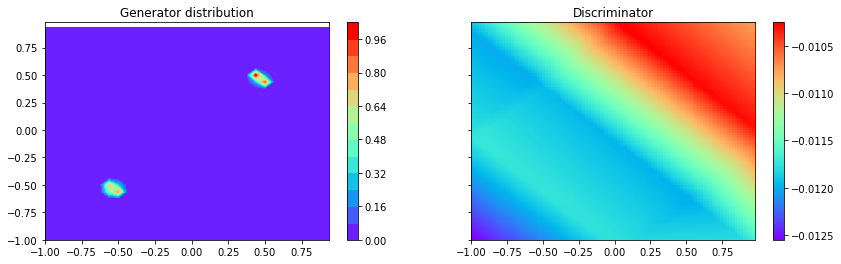

[92/100][999/1000] Loss_D: -0.00005636 Loss_G: 0.0110 D(G(z)): -0.0110


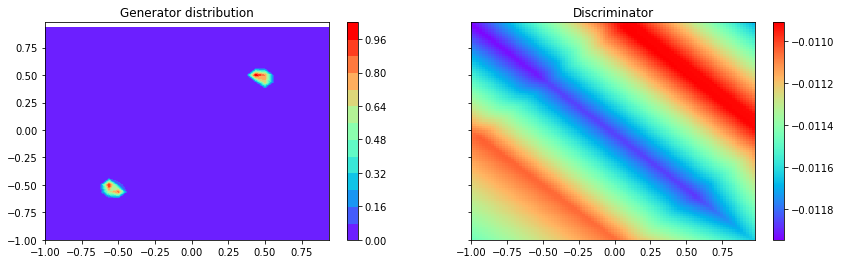

KeyboardInterrupt: 

In [28]:
for epoch in range(1, niter + 1):
    GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)
    for i in range(nElements):
        ############################
        # (1) Update D network
        ###########################
        # train with real
        for t in range(n_critic):
            netD.zero_grad()
            
            ## Real 
            real_cpu = GMutils.sample(batchSize)
            batch_size = real_cpu.size(0)
            input.data.resize_(real_cpu.size()).copy_(real_cpu)
            
            output_real = netD(input)
            
            ## Fake
            noise.data.resize_(batch_size, nz)
            noise.data.normal_(0, 1)
            fake = netG(noise).detach()
            
            output_fake = netD(fake)
            
            errD = - torch.mean(output_real) + torch.mean(output_fake)
            errD.backward()
            optimizerD.step()
                        
            # Clip
            for p in netD.parameters():
                p.data.clamp_(-c, c)

        ############################
        # (2) Update G network
        ###########################
        
        netG.zero_grad()
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = - torch.mean(output) - output.data.var()
        errG.backward()
        
        D_G_z2 = output.data.mean()
        
        optimizerG.step()
        
    print('[%d/%d][%d/%d] Loss_D: %.8f Loss_G: %.4f D(G(z)): %.4f'
              % (epoch, niter, i, nElements,
                 errD.data.sum(), errG.data[0], D_G_z2))
            
GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)

# N_critic = 100

In [34]:
batchSize = 64
nz = 10
nc = 2 # Number of outputs
ndf = 100
ngf = 100
niter = 100
nElements = 1000
lr = 0.00005
beta1 = 0.5
n_critic = 100 # Training more the discriminator

c = 0.01 # clip

In [35]:
netG = torch.nn.Sequential(
    torch.nn.Linear(nz, ngf),
    torch.nn.ReLU(),
    torch.nn.Linear(ngf, nc),
    torch.nn.Tanh()
)


netD = torch.nn.Sequential(
    torch.nn.Linear(nc, ndf),
    torch.nn.ReLU(),
    torch.nn.Linear(ndf, 1)
)

In [36]:
optimizerG = optim.RMSprop(netG.parameters(), lr = lr)
optimizerD = optim.RMSprop(netD.parameters(), lr = lr)

In [37]:
# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)

input = Variable(input)
noise = Variable(noise)

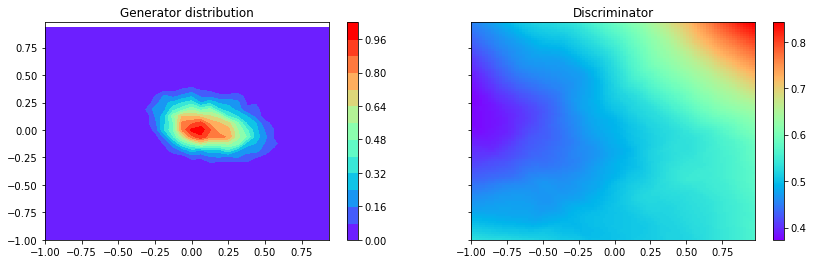

[1/100][999/1000] Loss_D: -0.00074696 Loss_G: -0.0130 D(G(z)): 0.0130


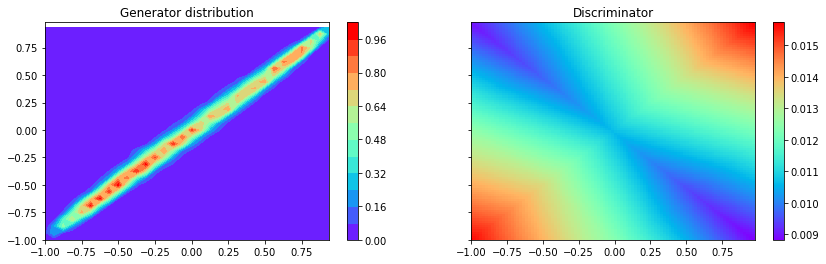

[2/100][999/1000] Loss_D: -0.00010381 Loss_G: -0.0104 D(G(z)): 0.0104


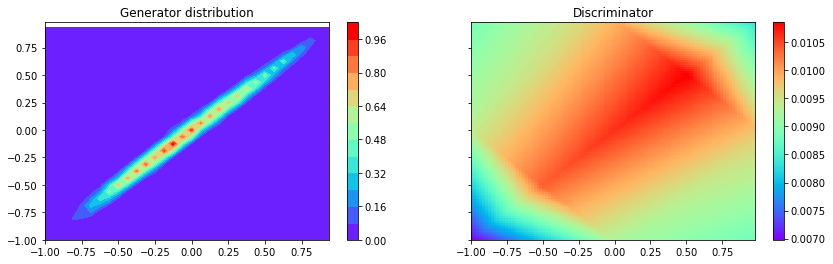

[3/100][999/1000] Loss_D: -0.00005005 Loss_G: -0.0106 D(G(z)): 0.0106


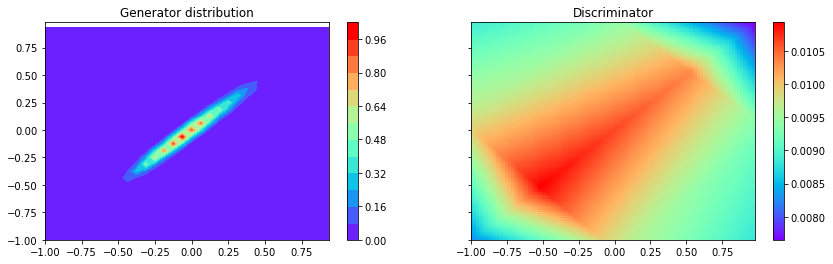

KeyboardInterrupt: 

In [38]:
for epoch in range(1, niter + 1):
    GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)
    for i in range(nElements):
        ############################
        # (1) Update D network
        ###########################
        # train with real
        for t in range(n_critic):
            netD.zero_grad()
            
            ## Real 
            real_cpu = GMutils.sample(batchSize)
            batch_size = real_cpu.size(0)
            input.data.resize_(real_cpu.size()).copy_(real_cpu)
            
            output_real = netD(input)
            
            ## Fake
            noise.data.resize_(batch_size, nz)
            noise.data.normal_(0, 1)
            fake = netG(noise).detach()
            
            output_fake = netD(fake)
            
            errD = - torch.mean(output_real) + torch.mean(output_fake)
            errD.backward()
            optimizerD.step()
                        
            # Clip
            for p in netD.parameters():
                p.data.clamp_(-c, c)

        ############################
        # (2) Update G network
        ###########################
        
        netG.zero_grad()
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = - torch.mean(output) - output.data.var()
        errG.backward()
        
        D_G_z2 = output.data.mean()
        
        optimizerG.step()
        
    print('[%d/%d][%d/%d] Loss_D: %.8f Loss_G: %.4f D(G(z)): %.4f'
              % (epoch, niter, i, nElements,
                 errD.data.sum(), errG.data[0], D_G_z2))
            
GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)

# Weight decay

In [44]:
batchSize = 64
nz = 10
nc = 2 # Number of outputs
ndf = 100
ngf = 100
niter = 100
nElements = 1000
lr = 0.00005
beta1 = 0.5
n_critic = 20 # Training more the discriminator

c = 0.01 # clip

In [45]:
netG = torch.nn.Sequential(
    torch.nn.Linear(nz, ngf),
    torch.nn.ReLU(),
    torch.nn.Linear(ngf, nc),
    torch.nn.Tanh()
)


netD = torch.nn.Sequential(
    torch.nn.Linear(nc, ndf),
    torch.nn.ReLU(),
    torch.nn.Linear(ndf, 1)
)

In [46]:
optimizerG = optim.RMSprop(netG.parameters(), lr = lr)
optimizerD = optim.RMSprop(netD.parameters(), lr = lr, weight_decay=1e-2)

In [47]:
# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)

input = Variable(input)
noise = Variable(noise)

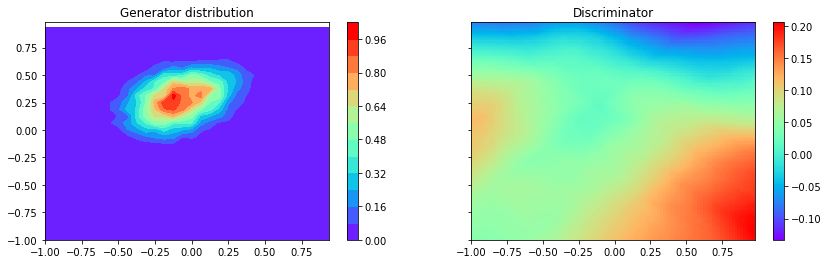

[1/100][999/1000] Loss_D: -0.00015212 Loss_G: -0.0006 D(G(z)): 0.0006


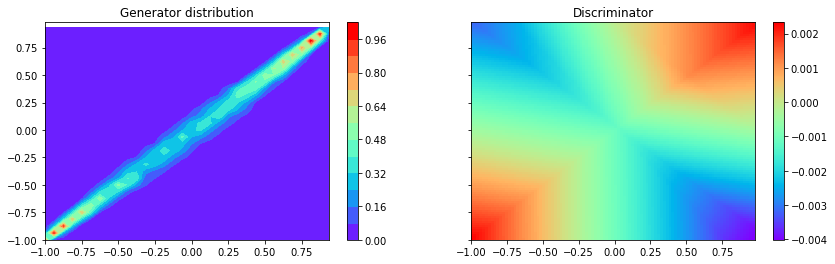

[2/100][999/1000] Loss_D: -0.00062005 Loss_G: 0.0008 D(G(z)): -0.0008


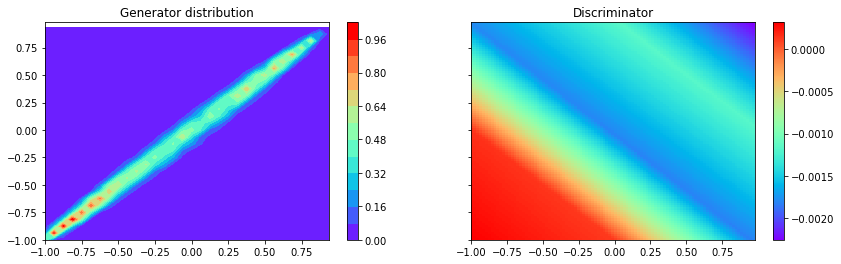

[3/100][999/1000] Loss_D: -0.00037490 Loss_G: 0.0006 D(G(z)): -0.0006


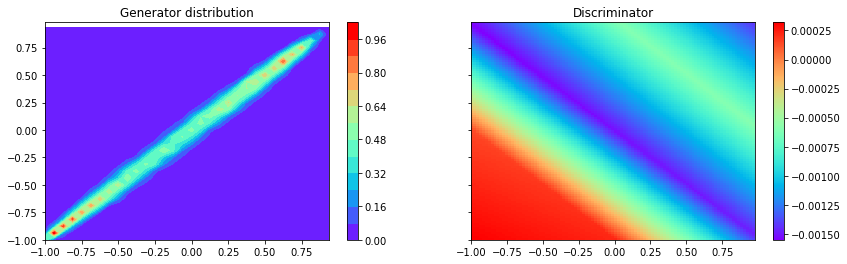

[4/100][999/1000] Loss_D: -0.00034597 Loss_G: 0.0008 D(G(z)): -0.0008


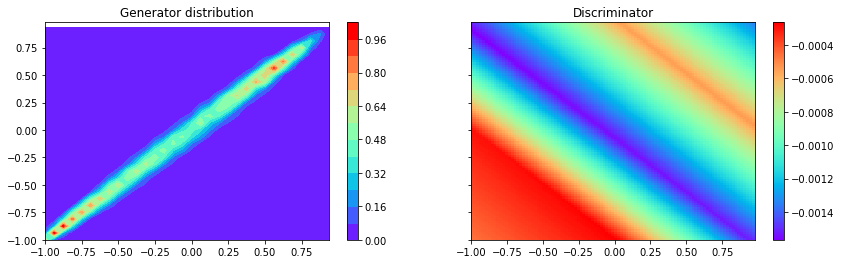

[5/100][999/1000] Loss_D: -0.00032010 Loss_G: 0.0010 D(G(z)): -0.0010


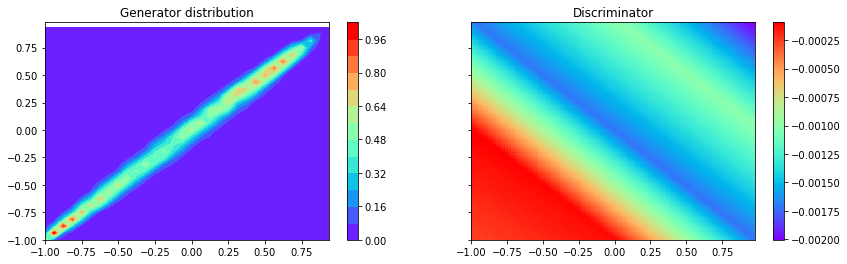

[6/100][999/1000] Loss_D: -0.00033215 Loss_G: 0.0013 D(G(z)): -0.0013


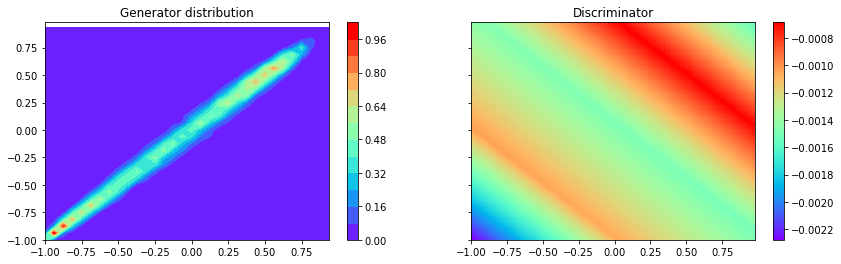

[7/100][999/1000] Loss_D: -0.00037672 Loss_G: 0.0005 D(G(z)): -0.0005


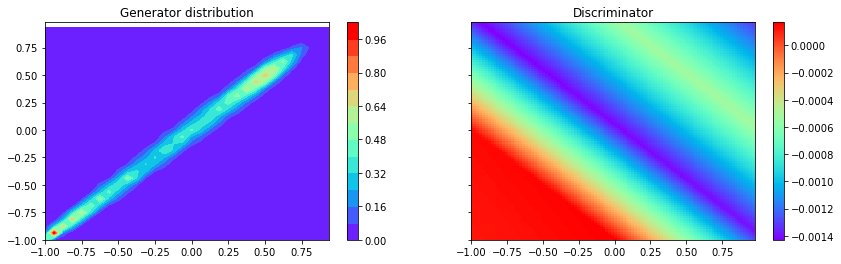

[8/100][999/1000] Loss_D: -0.00019742 Loss_G: 0.0006 D(G(z)): -0.0006


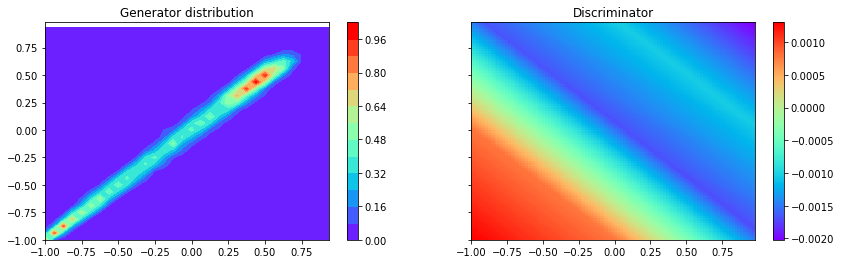

[9/100][999/1000] Loss_D: -0.00037772 Loss_G: 0.0009 D(G(z)): -0.0009


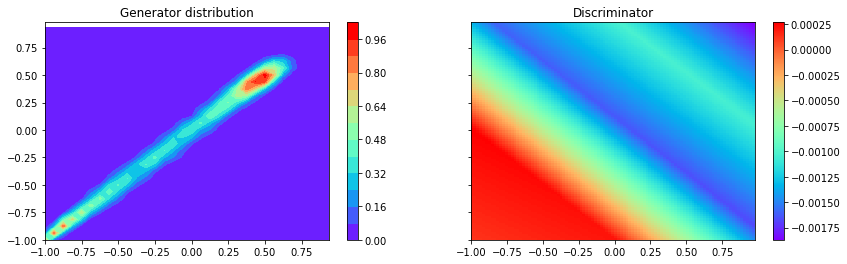

[10/100][999/1000] Loss_D: -0.00035522 Loss_G: 0.0011 D(G(z)): -0.0011


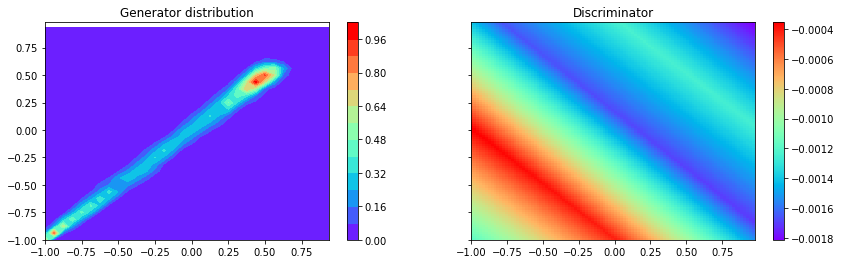

[11/100][999/1000] Loss_D: -0.00030183 Loss_G: 0.0013 D(G(z)): -0.0013


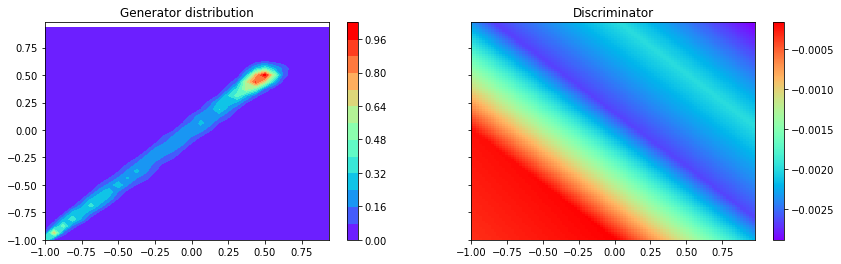

[12/100][999/1000] Loss_D: -0.00035560 Loss_G: 0.0020 D(G(z)): -0.0020


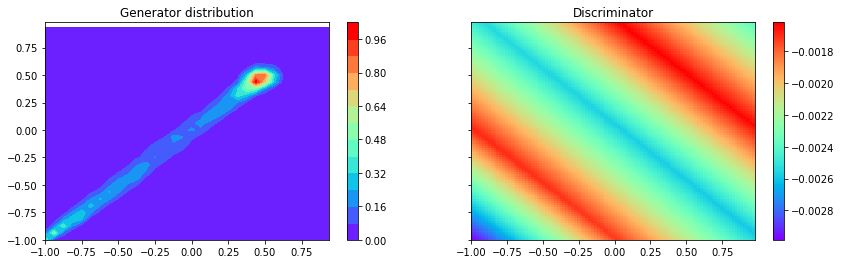

[13/100][999/1000] Loss_D: -0.00037851 Loss_G: 0.0022 D(G(z)): -0.0022


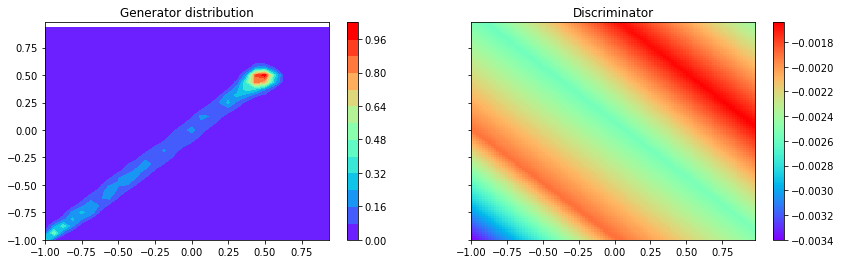

[14/100][999/1000] Loss_D: -0.00027821 Loss_G: 0.0020 D(G(z)): -0.0020


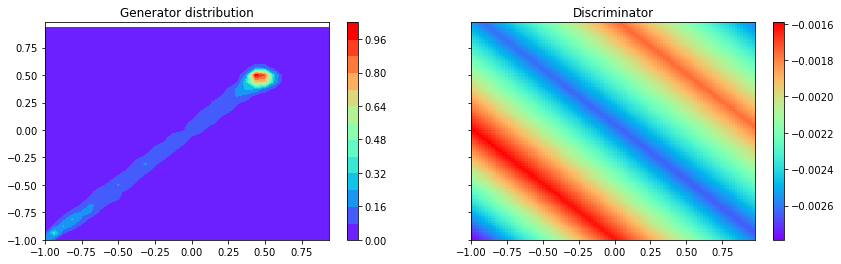

[15/100][999/1000] Loss_D: -0.00036472 Loss_G: 0.0018 D(G(z)): -0.0018


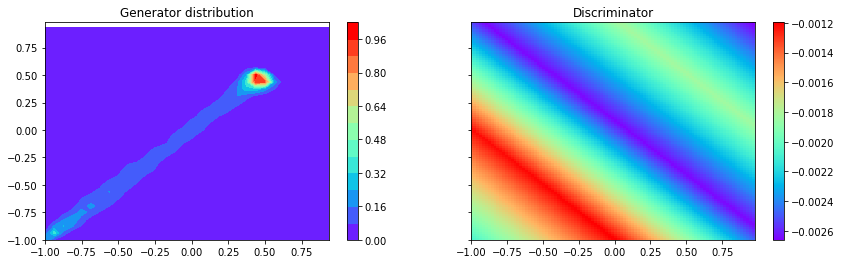

[16/100][999/1000] Loss_D: -0.00031533 Loss_G: 0.0019 D(G(z)): -0.0019


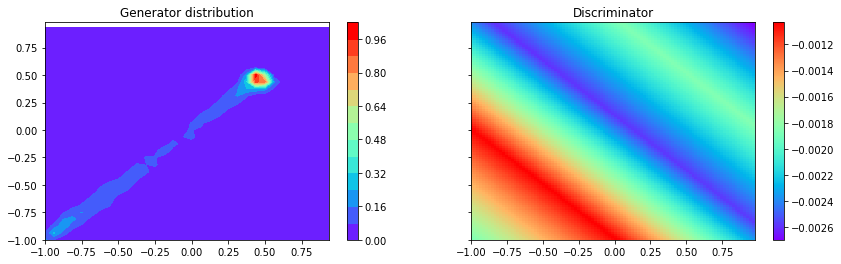

[17/100][999/1000] Loss_D: -0.00034961 Loss_G: 0.0021 D(G(z)): -0.0021


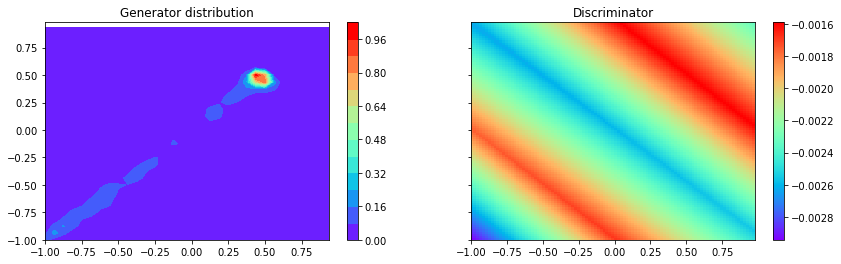

[18/100][999/1000] Loss_D: -0.00030719 Loss_G: 0.0017 D(G(z)): -0.0017


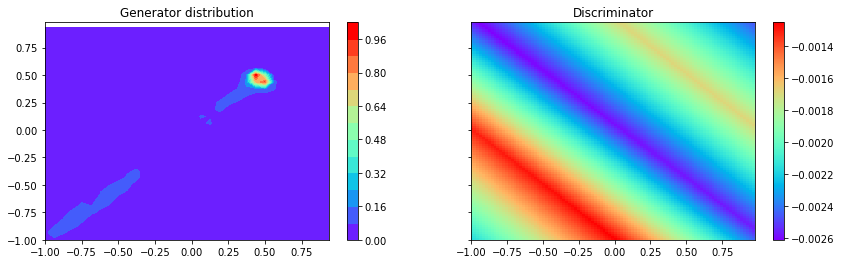

[19/100][999/1000] Loss_D: -0.00040617 Loss_G: 0.0016 D(G(z)): -0.0016


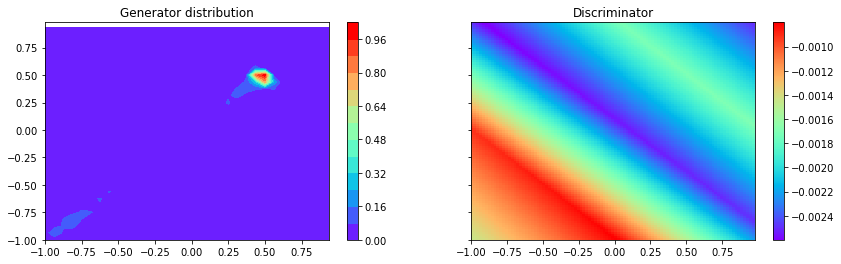

[20/100][999/1000] Loss_D: -0.00033663 Loss_G: 0.0015 D(G(z)): -0.0015


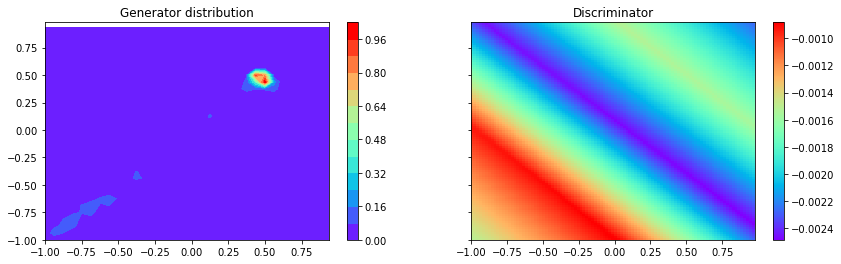

[21/100][999/1000] Loss_D: -0.00027469 Loss_G: 0.0015 D(G(z)): -0.0015


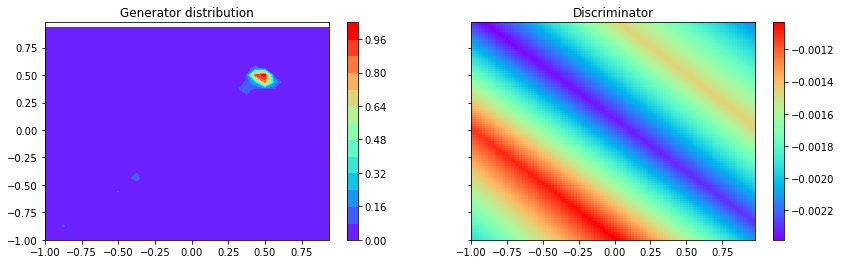

[22/100][999/1000] Loss_D: -0.00039932 Loss_G: 0.0016 D(G(z)): -0.0016


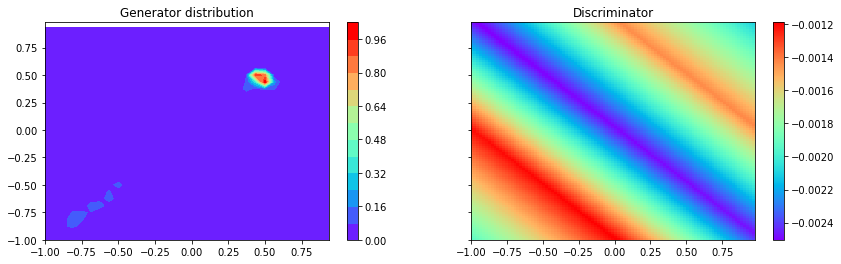

[23/100][999/1000] Loss_D: -0.00017359 Loss_G: 0.0015 D(G(z)): -0.0015


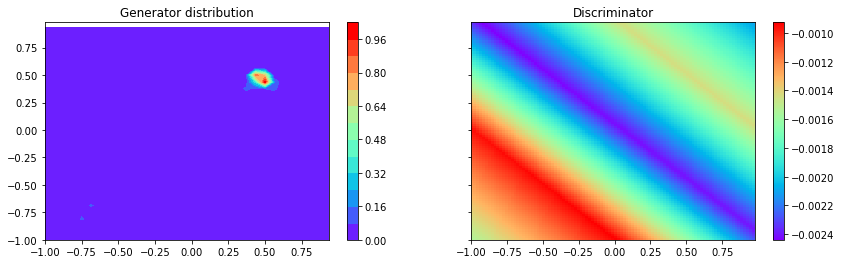

[24/100][999/1000] Loss_D: -0.00026501 Loss_G: 0.0015 D(G(z)): -0.0015


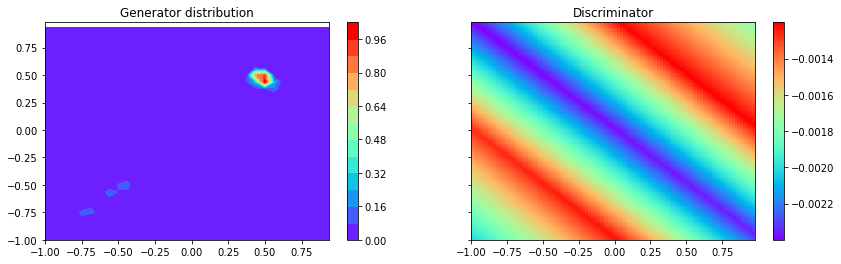

[25/100][999/1000] Loss_D: -0.00033262 Loss_G: 0.0015 D(G(z)): -0.0015


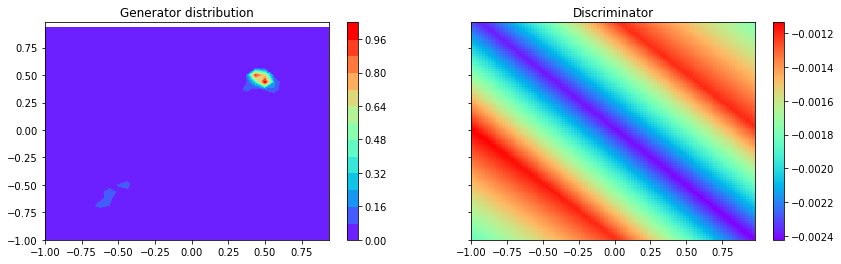

[26/100][999/1000] Loss_D: -0.00030023 Loss_G: 0.0011 D(G(z)): -0.0011


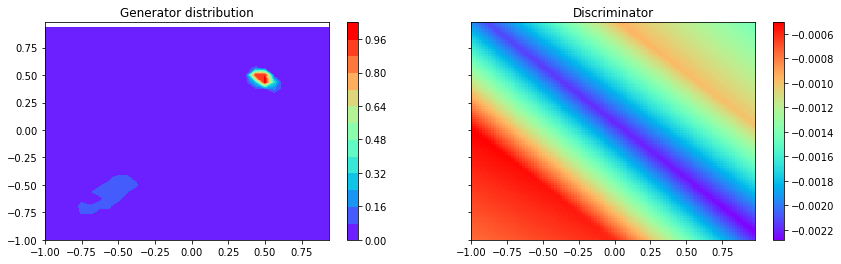

[27/100][999/1000] Loss_D: -0.00026630 Loss_G: 0.0013 D(G(z)): -0.0013


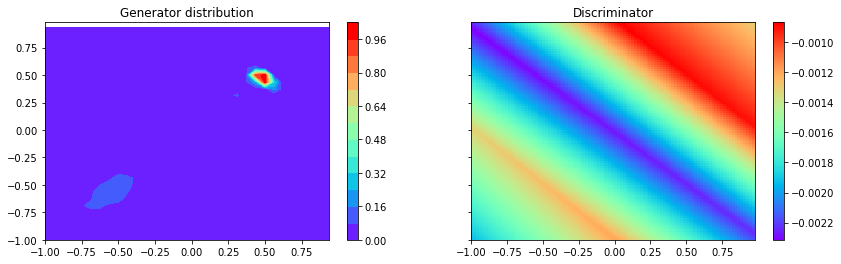

[28/100][999/1000] Loss_D: -0.00019705 Loss_G: 0.0013 D(G(z)): -0.0013


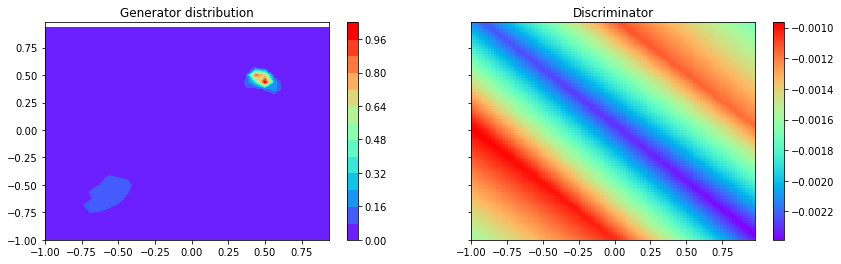

[29/100][999/1000] Loss_D: -0.00024111 Loss_G: 0.0010 D(G(z)): -0.0010


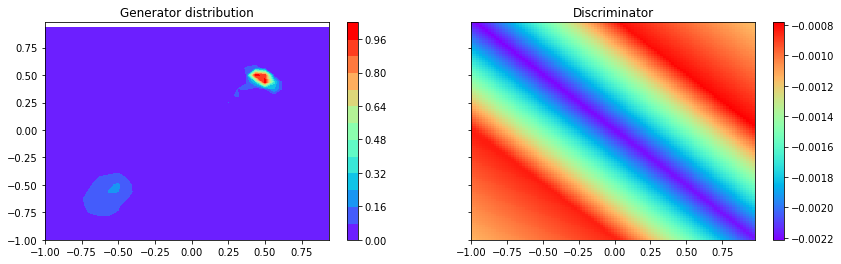

[30/100][999/1000] Loss_D: -0.00020184 Loss_G: 0.0012 D(G(z)): -0.0012


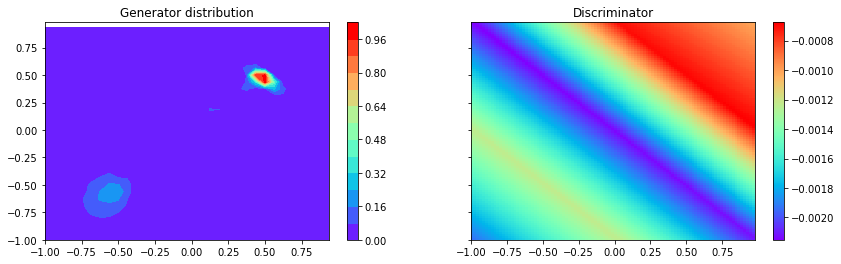

[31/100][999/1000] Loss_D: -0.00020731 Loss_G: 0.0011 D(G(z)): -0.0011


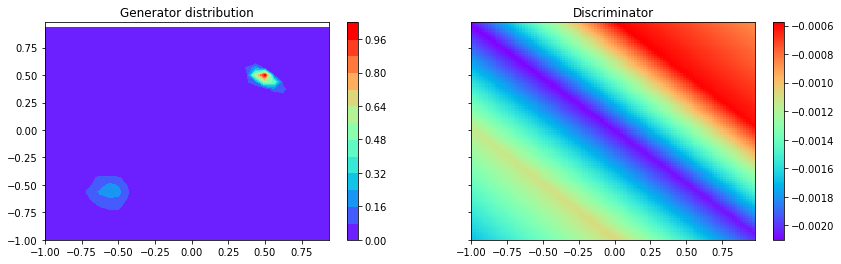

[32/100][999/1000] Loss_D: -0.00018536 Loss_G: 0.0007 D(G(z)): -0.0007


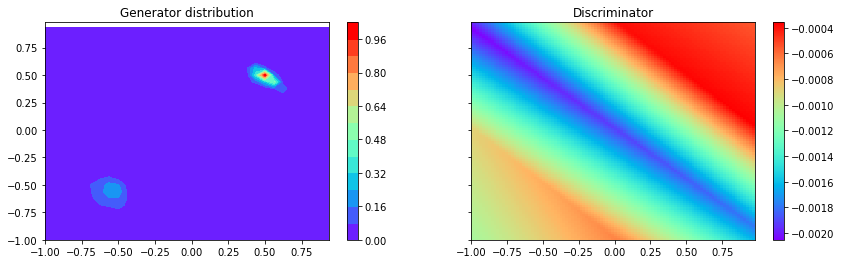

[33/100][999/1000] Loss_D: -0.00015470 Loss_G: 0.0006 D(G(z)): -0.0006


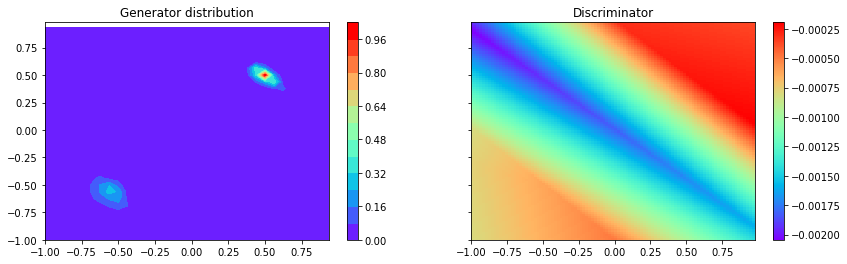

[34/100][999/1000] Loss_D: -0.00014074 Loss_G: 0.0003 D(G(z)): -0.0003


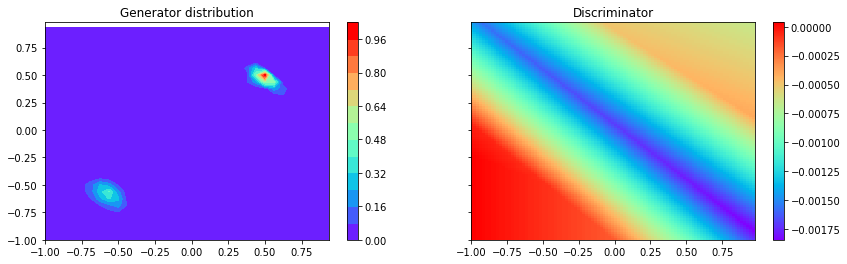

[35/100][999/1000] Loss_D: -0.00024331 Loss_G: 0.0009 D(G(z)): -0.0009


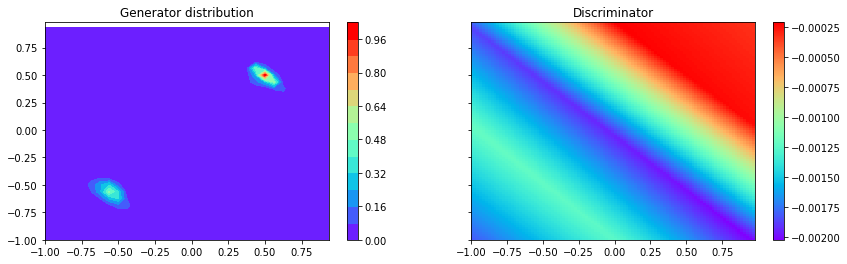

[36/100][999/1000] Loss_D: -0.00011283 Loss_G: 0.0005 D(G(z)): -0.0005


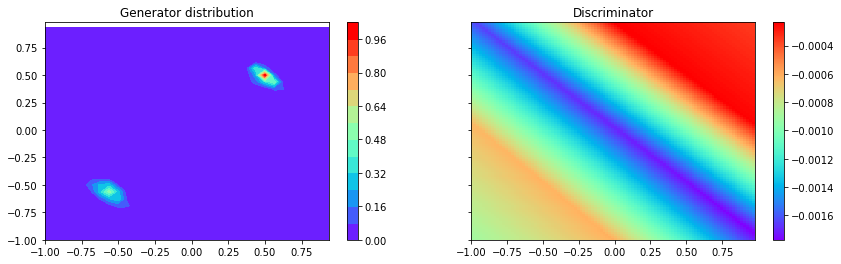

[37/100][999/1000] Loss_D: -0.00007679 Loss_G: 0.0003 D(G(z)): -0.0003


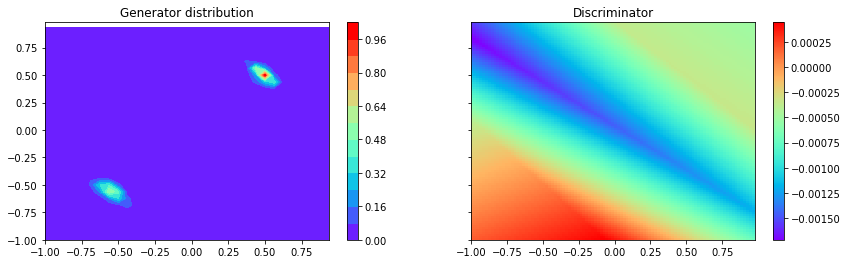

KeyboardInterrupt: 

In [48]:
for epoch in range(1, niter + 1):
    GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)
    for i in range(nElements):
        ############################
        # (1) Update D network
        ###########################
        # train with real
        for t in range(n_critic):
            netD.zero_grad()
            
            ## Real 
            real_cpu = GMutils.sample(batchSize)
            batch_size = real_cpu.size(0)
            input.data.resize_(real_cpu.size()).copy_(real_cpu)
            
            output_real = netD(input)
            
            ## Fake
            noise.data.resize_(batch_size, nz)
            noise.data.normal_(0, 1)
            fake = netG(noise).detach()
            
            output_fake = netD(fake)
            
            errD = - torch.mean(output_real) + torch.mean(output_fake)
            errD.backward()
            optimizerD.step()
                        
            # Clip
            for p in netD.parameters():
                p.data.clamp_(-c, c)

        ############################
        # (2) Update G network
        ###########################
        
        netG.zero_grad()
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = - torch.mean(output) - output.data.var()
        errG.backward()
        
        D_G_z2 = output.data.mean()
        
        optimizerG.step()
        
    print('[%d/%d][%d/%d] Loss_D: %.8f Loss_G: %.4f D(G(z)): %.4f'
              % (epoch, niter, i, nElements,
                 errD.data.sum(), errG.data[0], D_G_z2))
            
GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)